In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
raw_data= pd.read_csv('train_FD001.txt', sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3',
                    'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3',
                    'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6',
                    'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9',
                    'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12',
                    'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15',
                    'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
                    'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure12  \
0             1589.70         1400.60           14.62  ...           521.66   
1             1591.82         1403.14           14.62  ...           522.28   
2             1587.99         1404.20           14.62  ...           522.42   
3             1582.79         1401.87           14.62  ...           522.86   
4             1582.85         1406.22           14.62  ...           522.19   
...               ...             ...             ...  ...              ...   
20626         1597.98         1428.63           14.62  ...           519.49   
20627         1604.50         1433.58           14.62  ...           519.68   
20628         1602.46         1428.18           14.62  ...           520.01   
20629         1605.26         1426.53           14.62  ...           519.67   
20630         1600.38         1432.14           14.62  ...           519.30   

       SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  \
0              2388.02          8138.62           8.4195             0.03   
1              2388.07          8131.49           8.4318             0.03   
2              2388.03          8133.23           8.4178             0.03   
3              2388.08          8133.83           8.3682             0.03   
4              2388.04          8133.80           8.4294             0.03   
...                ...              ...              ...              ...   
20626          2388.26          8137.60           8.4956             0.03   
20627          2388.22          8136.50           8.5139             0.03   
20628          2388.24          8141.05           8.5646             0.03   
20629          2388.23          8139.29           8.5389             0.03   
20630          2388.26          8137.33           8.5036             0.03   

       SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  \
0                  392             2388            100.0            39.06   
1                  392             2388            100.0            39.00   
2                  390             2388            100.0            38.95   
3                  392             2388            100.0            38.88   
4                  393             2388            100.0            38.90   
...                ...              ...              ...              ...   
20626              397             2388            100.0            38.49   
20627              395             2388            100.0            38.30   
20628              398             2388            100.0            38.44   
20629              395             2388            100.0            38.29   
20630              396             2388            100.0            38.37   

       SensorMeasure21  
0              23.4190  
1              23.4236  
2              23.3442  
3              23.3739  
4              23.4044  
...                ...  
20626          22.9735  
20627          23.1594  
20628          22.9333  
20629          23.0640  
20630    

RUL = EOL - Cycle

RUL = Remaining Useful Life
EOL = End of Life in cycles

In [84]:
EOL=[]
for sl_no in raw_data['ID']:
       EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1]) 

In [85]:
raw_data["EOL"]=EOL
raw_data

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure13  \
0             1589.70         1400.60           14.62  ...          2388.02   
1             1591.82         1403.14           14.62  ...          2388.07   
2             1587.99         1404.20           14.62  ...          2388.03   
3             1582.79         1401.87           14.62  ...          2388.08   
4             1582.85         1406.22           14.62  ...          2388.04   
...               ...             ...             ...  ...              ...   
20626         1597.98         1428.63           14.62  ...          2388.26   
20627         1604.50         1433.58           14.62  ...          2388.22   
20628         1602.46         1428.18           14.62  ...          2388.24   
20629         1605.26         1426.53           14.62  ...          2388.23   
20630         1600.38         1432.14           14.62  ...          2388.26   

       SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  \
0              8138.62           8.4195             0.03              392   
1              8131.49           8.4318             0.03              392   
2              8133.23           8.4178             0.03              390   
3              8133.83           8.3682             0.03              392   
4              8133.80           8.4294             0.03              393   
...                ...              ...              ...              ...   
20626          8137.60           8.4956             0.03              397   
20627          8136.50           8.5139             0.03              395   
20628          8141.05           8.5646             0.03              398   
20629          8139.29           8.5389             0.03              395   
20630          8137.33           8.5036             0.03              396   

       SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  EOL  
0                 2388            100.0            39.06          23.4190  192  
1                 2388            100.0            39.00          23.4236  192  
2                 2388            100.0            38.95          23.3442  192  
3                 2388            100.0            38.88          23.3739  192  
4                 2388            100.0            38.90          23.4044  192  
...                ...              ...              ...              ...  ...  
20626             2388            100.0            38.49          22.9735  200  
20627             2388            100.0            38.30          23.1594  200  
20628             2388            100.0            38.44          22.9333  200  
20629             2388            100.0            38.29          23.0640  200  
20630             2388            100.0            38.37          23.0522  200  

[20631 rows x 27 columns]

In [86]:
raw_data["RUL"] = raw_data["EOL"]-raw_data["Cycle"]
df = raw_data.drop(columns=['EOL'])
df

ID  Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0        1      1 -0.0007 -0.0004   100.0          518.67          641.82   
1        1      2  0.0019 -0.0003   100.0          518.67          642.15   
2        1      3 -0.0043  0.0003   100.0          518.67          642.35   
3        1      4  0.0007  0.0000   100.0          518.67          642.35   
4        1      5 -0.0019 -0.0002   100.0          518.67          642.37   
...    ...    ...     ...     ...     ...             ...             ...   
20626  100    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627  100    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628  100    198  0.0004  0.0000   100.0          518.67          643.42   
20629  100    199 -0.0011  0.0003   100.0          518.67          643.23   
20630  100    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  ...  SensorMeasure13  \
0             1589.70         1400.60           14.62  ...          2388.02   
1             1591.82         1403.14           14.62  ...          2388.07   
2             1587.99         1404.20           14.62  ...          2388.03   
3             1582.79         1401.87           14.62  ...          2388.08   
4             1582.85         1406.22           14.62  ...          2388.04   
...               ...             ...             ...  ...              ...   
20626         1597.98         1428.63           14.62  ...          2388.26   
20627         1604.50         1433.58           14.62  ...          2388.22   
20628         1602.46         1428.18           14.62  ...          2388.24   
20629         1605.26         1426.53           14.62  ...          2388.23   
20630         1600.38         1432.14           14.62  ...          2388.26   

       SensorMeasure14  SensorMeasure15  SensorMeasure16  SensorMeasure17  \
0              8138.62           8.4195             0.03              392   
1              8131.49           8.4318             0.03              392   
2              8133.23           8.4178             0.03              390   
3              8133.83           8.3682             0.03              392   
4              8133.80           8.4294             0.03              393   
...                ...              ...              ...              ...   
20626          8137.60           8.4956             0.03              397   
20627          8136.50           8.5139             0.03              395   
20628          8141.05           8.5646             0.03              398   
20629          8139.29           8.5389             0.03              395   
20630          8137.33           8.5036             0.03              396   

       SensorMeasure18  SensorMeasure19  SensorMeasure20  SensorMeasure21  RUL  
0                 2388            100.0            39.06          23.4190  191  
1                 2388            100.0            39.00          23.4236  190  
2                 2388            100.0            38.95          23.3442  189  
3                 2388            100.0            38.88          23.3739  188  
4                 2388            100.0            38.90          23.4044  187  
...                ...              ...              ...              ...  ...  
20626             2388            100.0            38.49          22.9735    4  
20627             2388            100.0            38.30          23.1594    3  
20628             2388            100.0            38.44          22.9333    2  
20629             2388            100.0            38.29          23.0640    1  
20630             2388            100.0            38.37          23.0522    0  

[20631 rows x 27 columns]

In [87]:
df1 = df.drop(['ID'], axis = 1)

In [93]:
df1

Cycle  OpSet1  OpSet2  OpSet3  SensorMeasure1  SensorMeasure2  \
0          1 -0.0007 -0.0004   100.0          518.67          641.82   
1          2  0.0019 -0.0003   100.0          518.67          642.15   
2          3 -0.0043  0.0003   100.0          518.67          642.35   
3          4  0.0007  0.0000   100.0          518.67          642.35   
4          5 -0.0019 -0.0002   100.0          518.67          642.37   
...      ...     ...     ...     ...             ...             ...   
20626    196 -0.0004 -0.0003   100.0          518.67          643.49   
20627    197 -0.0016 -0.0005   100.0          518.67          643.54   
20628    198  0.0004  0.0000   100.0          518.67          643.42   
20629    199 -0.0011  0.0003   100.0          518.67          643.23   
20630    200 -0.0032 -0.0005   100.0          518.67          643.85   

       SensorMeasure3  SensorMeasure4  SensorMeasure5  SensorMeasure6  ...  \
0             1589.70         1400.60           14.62           21.61  ...   
1             1591.82         1403.14           14.62           21.61  ...   
2             1587.99         1404.20           14.62           21.61  ...   
3             1582.79         1401.87           14.62           21.61  ...   
4             1582.85         1406.22           14.62           21.61  ...   
...               ...             ...             ...             ...  ...   
20626         1597.98         1428.63           14.62           21.61  ...   
20627         1604.50         1433.58           14.62           21.61  ...   
20628         1602.46         1428.18           14.62           21.61  ...   
20629         1605.26         1426.53           14.62           21.61  ...   
20630         1600.38         1432.14           14.62           21.61  ...   

       SensorMeasure13  SensorMeasure14  SensorMeasure15  SensorMeasure16  \
0              2388.02          8138.62           8.4195             0.03   
1              2388.07          8131.49           8.4318             0.03   
2              2388.03          8133.23           8.4178             0.03   
3              2388.08          8133.83           8.3682             0.03   
4              2388.04          8133.80           8.4294             0.03   
...                ...              ...              ...              ...   
20626          2388.26          8137.60           8.4956             0.03   
20627          2388.22          8136.50           8.5139             0.03   
20628          2388.24          8141.05           8.5646             0.03   
20629          2388.23          8139.29           8.5389             0.03   
20630          2388.26          8137.33           8.5036             0.03   

       SensorMeasure17  SensorMeasure18  SensorMeasure19  SensorMeasure20  \
0                  392             2388            100.0            39.06   
1                  392             2388            100.0            39.00   
2                  390             2388            100.0            38.95   
3                  392             2388            100.0            38.88   
4                  393             2388            100.0            38.90   
...                ...              ...              ...              ...   
20626              397             2388            100.0            38.49   
20627              395             2388            100.0            38.30   
20628              398             2388            100.0            38.44   
20629              395             2388            100.0            38.29   
20630              396             2388            100.0            38.37   

       SensorMeasure21  RUL  
0              23.4190  191  
1              23.4236  190  
2              23.3442  189  
3              23.3739  188  
4              23.4044  187  
...                ...  ...  
20626          22.9735    4  
20627          23.1594    3  
20628          22.9333    2  
20629          23.0640    1  
20630          23.0522   

[Text(0, 0.5, 'Cycle'),
 Text(0, 1.5, 'OpSet1'),
 Text(0, 2.5, 'OpSet2'),
 Text(0, 3.5, 'OpSet3'),
 Text(0, 4.5, 'SensorMeasure1'),
 Text(0, 5.5, 'SensorMeasure2'),
 Text(0, 6.5, 'SensorMeasure3'),
 Text(0, 7.5, 'SensorMeasure4'),
 Text(0, 8.5, 'SensorMeasure5'),
 Text(0, 9.5, 'SensorMeasure6'),
 Text(0, 10.5, 'SensorMeasure7'),
 Text(0, 11.5, 'SensorMeasure8'),
 Text(0, 12.5, 'SensorMeasure9'),
 Text(0, 13.5, 'SensorMeasure10'),
 Text(0, 14.5, 'SensorMeasure11'),
 Text(0, 15.5, 'SensorMeasure12'),
 Text(0, 16.5, 'SensorMeasure13'),
 Text(0, 17.5, 'SensorMeasure14'),
 Text(0, 18.5, 'SensorMeasure15'),
 Text(0, 19.5, 'SensorMeasure16'),
 Text(0, 20.5, 'SensorMeasure17'),
 Text(0, 21.5, 'SensorMeasure18'),
 Text(0, 22.5, 'SensorMeasure19'),
 Text(0, 23.5, 'SensorMeasure20'),
 Text(0, 24.5, 'SensorMeasure21'),
 Text(0, 25.5, 'RUL')]

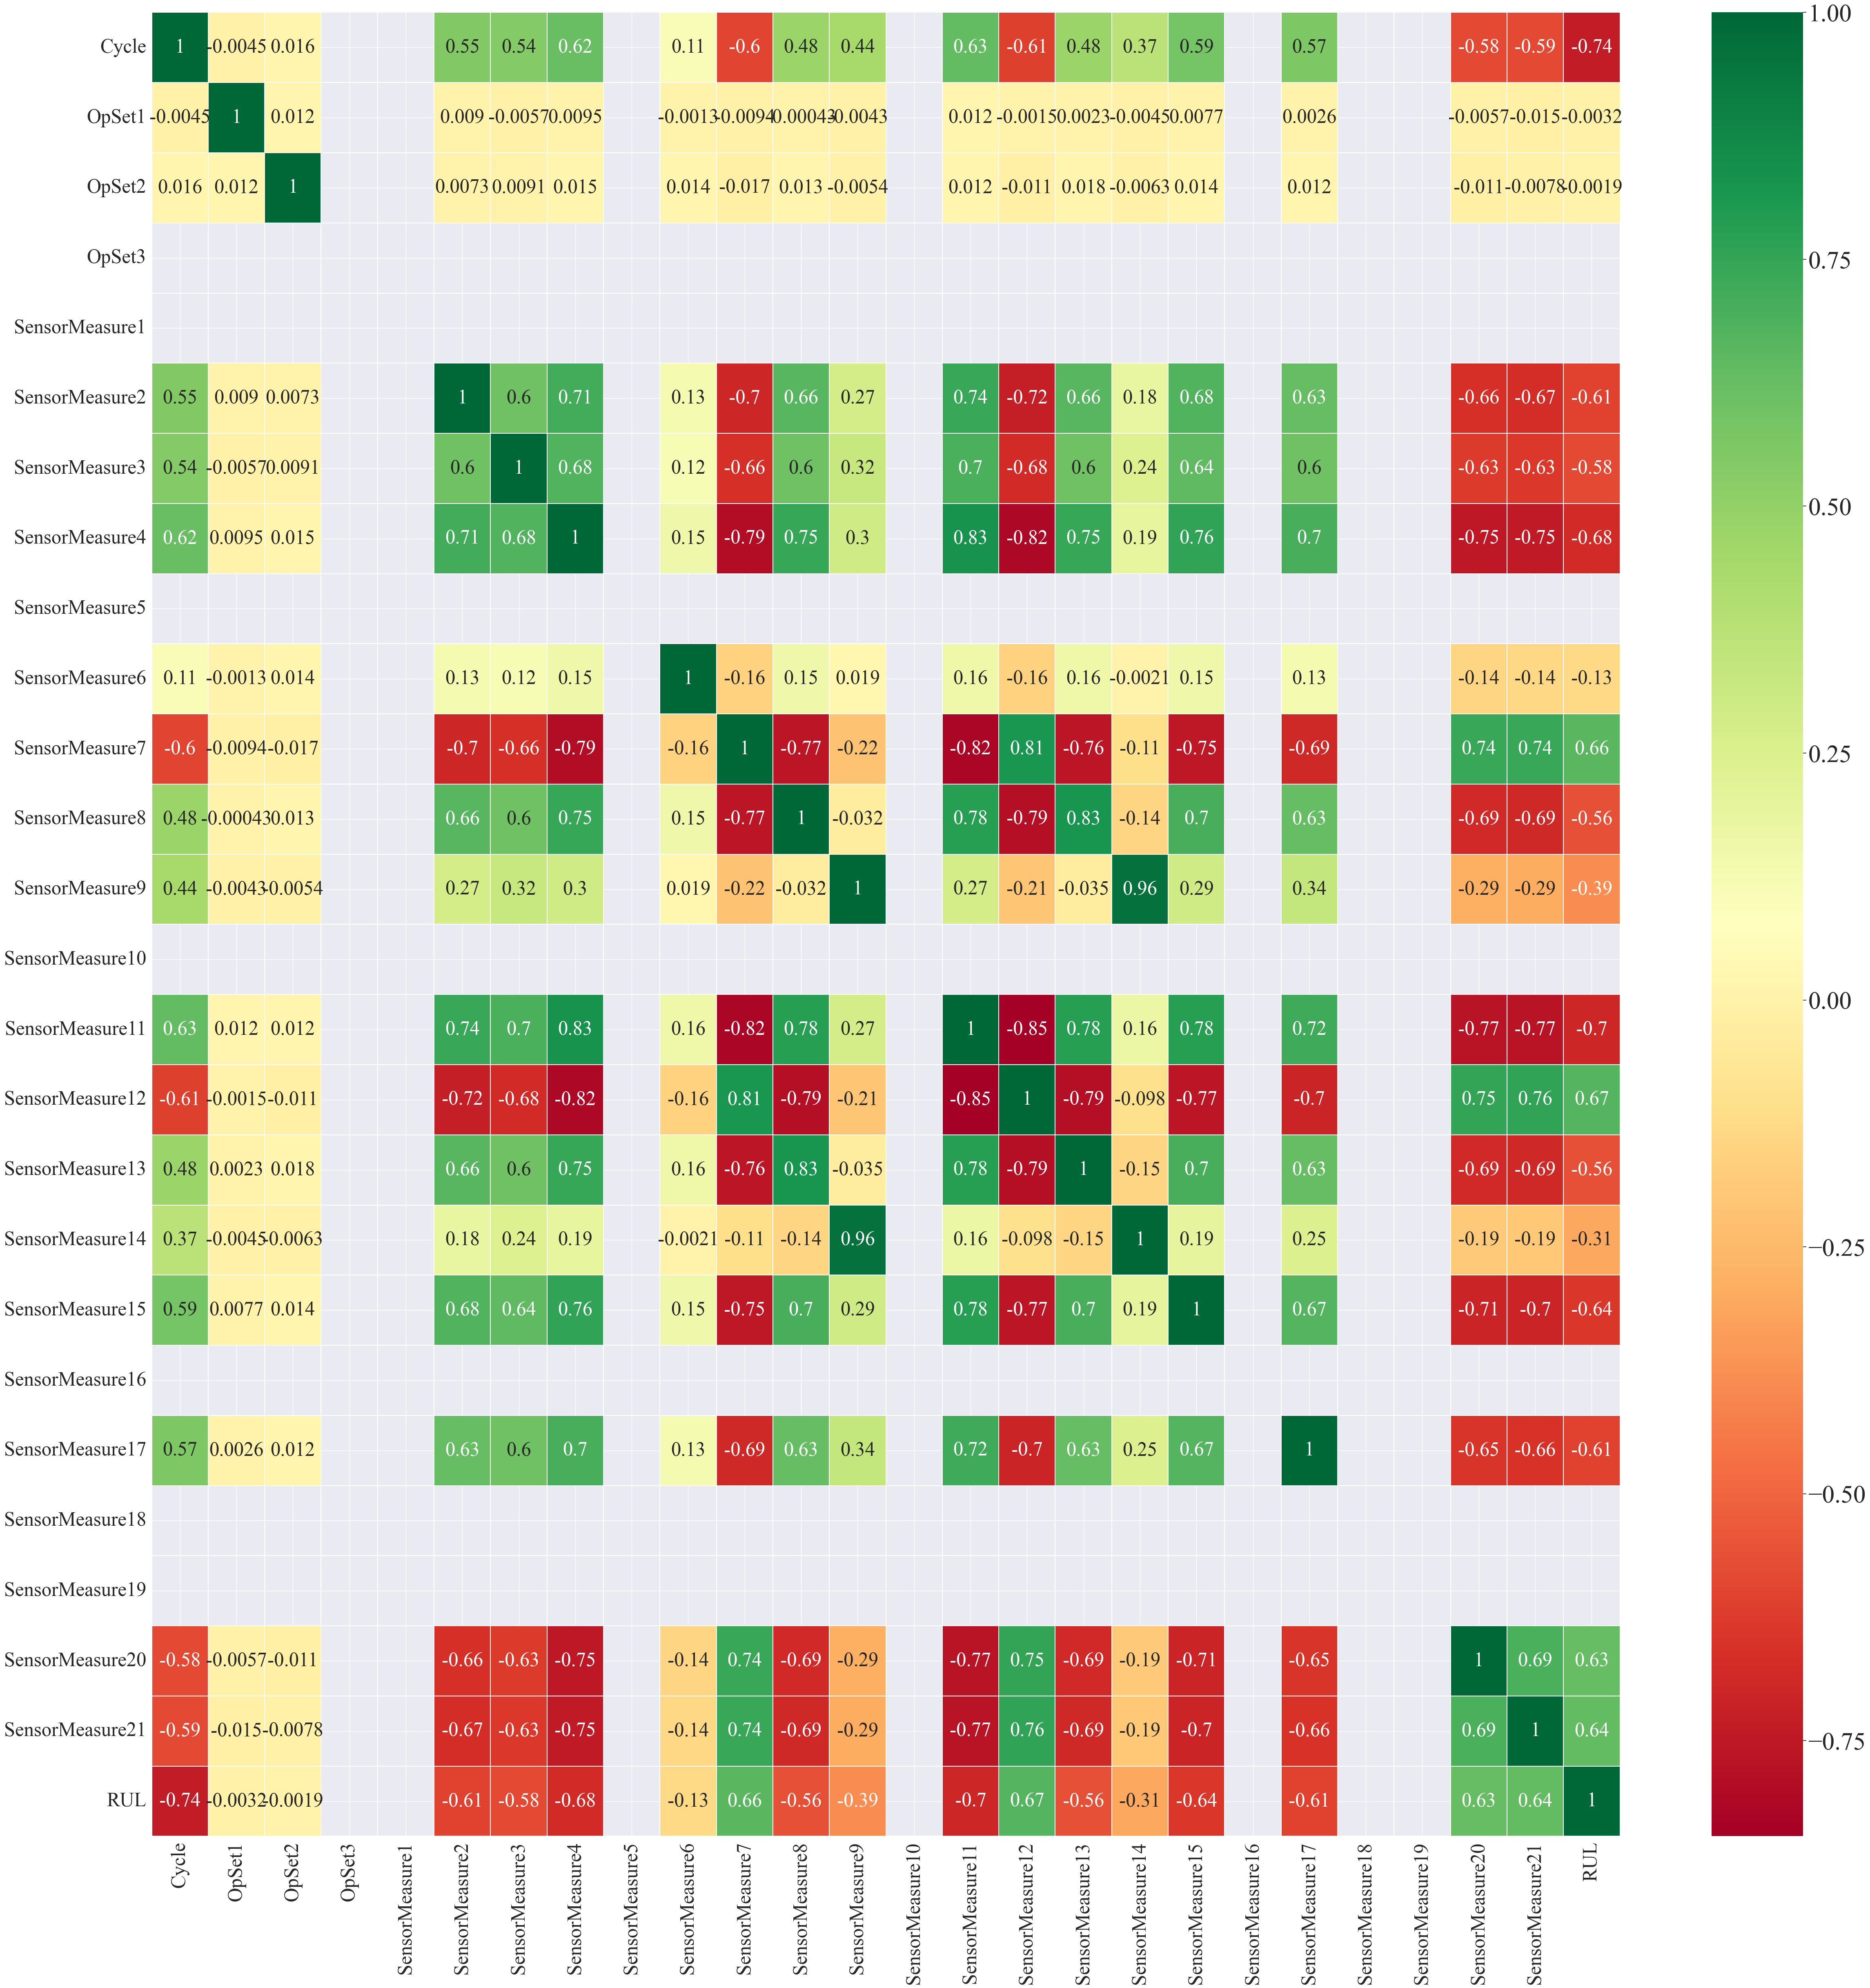

In [99]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(58,58))
#plt.savefig('Corrplot.png',bbox_inches='tight')
sns.set(font_scale=4,font="Times New Roman")

#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),cmap="RdYlGn", linewidths=0.1, annot=True, annot_kws={"size":35})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 35)
g.set_yticklabels(g.get_xmajorticklabels(), fontsize = 35)

In [95]:
# deleting columns which have correlation below 0.5
delete_columns=[]

for col in df.columns:
    corr = df[col].corr(df['RUL'])
    #print(col,corr)
    if abs(corr)>0.5:
        pass
    else:    
        delete_columns.append(col)
        
delete_columns

['ID',
 'OpSet1',
 'OpSet2',
 'OpSet3',
 'SensorMeasure1',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure14',
 'SensorMeasure16',
 'SensorMeasure18',
 'SensorMeasure19']

In [39]:
delete_columns = ['OpSet1',
 'OpSet2',
 'OpSet3',
 'SensorMeasure1',
 'SensorMeasure5',
 'SensorMeasure6',
 'SensorMeasure9',
 'SensorMeasure10',
 'SensorMeasure14',
 'SensorMeasure16',
 'SensorMeasure18',
 'SensorMeasure19']

In [40]:
new_df = df.drop(columns=delete_columns)
new_df

ID  Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
0        1      1          549.68         1343.43         1112.93   
1        1      2          606.07         1477.61         1237.50   
2        1      3          548.95         1343.12         1117.05   
3        1      4          548.70         1341.24         1118.03   
4        1      5          536.10         1255.23         1033.59   
...    ...    ...             ...             ...             ...   
61244  249    251          605.33         1516.36         1315.28   
61245  249    252          643.42         1598.92         1426.77   
61246  249    253          643.68         1607.72         1430.56   
61247  249    254          555.77         1381.29         1148.18   
61248  249    255          549.85         1369.75         1147.45   

       SensorMeasure7  SensorMeasure8  SensorMeasure11  SensorMeasure12  \
0              137.36         2211.86            41.69           129.78   
1              332.10         2323.66            43.94           312.59   
2              138.18         2211.92            41.66           129.62   
3              137.98         2211.88            41.68           129.80   
4              174.82         1915.22            36.48           164.11   
...               ...             ...              ...              ...   
61244          404.59         2319.66            46.08           380.16   
61245          567.59         2388.47            48.04           535.02   
61246          569.04         2388.51            48.24           535.41   
61247          199.93         2223.78            42.53           187.92   
61248          142.47         2212.52            42.60           134.32   

       SensorMeasure13  SensorMeasure15  SensorMeasure17  SensorMeasure20  \
0              2387.99           9.3335              330            10.62   
1              2387.73           9.1913              361            24.37   
2              2387.97           9.4007              329            10.48   
3              2388.02           9.3369              328            10.54   
4              2028.08          10.8366              305            14.03   
...                ...              ...              ...              ...   
61244          2388.73           8.4541              372            29.11   
61245          2388.46           8.2221              396            39.38   
61246          2388.48           8.2525              395            39.78   
61247          2388.83           9.0515              337            15.26   
61248          2388.66           9.1207              333            10.66   

       SensorMeasure21  RUL  
0               6.3670  320  
1              14.6552  319  
2               6.4213  318  
3               6.4176  317  
4               8.6754  316  
...                ...  ...  
61244          17.5234    4  
61245          23.7151    3  
61246          23.8270    2  
61247           9.0774    1  
61248           6.4341    0  

[61249 rows x 15 columns]

In [41]:
new_df.to_csv('Processed_Train_004.csv', index=None)

In [43]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  \
9711      1          642.12         1582.50         1400.44          553.76   
9712      2          642.62         1589.90         1404.14          554.52   
9713      3          642.55         1582.75         1403.42          554.26   
9714      4          642.61         1586.91         1403.46          554.56   
9715      5          642.41         1589.70         1401.43          554.26   
...     ...             ...             ...             ...             ...   
9904    194          643.77         1604.93         1423.51          551.41   
9905    195          643.33         1605.31         1434.87          551.25   
9906    196          643.32         1602.26         1430.01          551.40   
9907    197          643.73         1599.94         1432.87          551.18   
9908    198          643.83         1608.20         1433.88          552.06   

      SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMeasure13  \
9711         2388.05            47.31           521.97          2388.08   
9712         2388.02            47.31           522.27          2388.02   
9713         2388.04            47.41           522.40          2388.04   
9714         2388.05            47.46           522.25          2388.08   
9715         2388.05            47.33           522.10          2388.00   
...              ...              ...              ...              ...   
9904         2388.18            48.16           519.85          2388.19   
9905         2388.17            48.14           519.33          2388.21   
9906         2388.19            48.24           519.88          2388.17   
9907         2388.19            48.22           519.48          2388.20   
9908         2388.20            48.01           520.00          2388.25   

      SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  
9711           8.4366              394            38.96          23.3947  197  
9712           8.4211              394            38.91          23.4594  196  
9713           8.3931              392            38.97          23.3230  195  
9714           8.4286              393            38.91          23.3886  194  
9715           8.4295              394            38.98          23.3340  193  
...               ...              ...              ...              ...  ...  
9904           8.5043              396            38.42          23.0543    4  
9905           8.5352              395            38.45          23.0191    3  
9906           8.5034              395            38.45          23.0379    2  
9907           8.5241              397            38.52          23.0832    1  
9908           8.5002              396            38.43          23.1086    0  

[198 rows x 14 columns]

In [44]:
################################## Scalling the DATA
scaler=MinMaxScaler()
df = scaler.fit_transform(df)
print('Shape of df for engine {}: '.format(engine_id),df.shape)
df

Shape of df for engine 50:  (198, 14)


array([[0.        , 0.14222222, 0.19258561, ..., 0.78571429, 0.82617801,
        1.        ],
       [0.00507614, 0.36444444, 0.42507069, ..., 0.72619048, 0.96167539,
        0.99492386],
       [0.01015228, 0.33333333, 0.20043984, ..., 0.79761905, 0.67602094,
        0.98984772],
       ...,
       [0.98984772, 0.67555556, 0.8133836 , ..., 0.17857143, 0.07895288,
        0.01015228],
       [0.99492386, 0.85777778, 0.74049639, ..., 0.26190476, 0.17382199,
        0.00507614],
       [1.        , 0.90222222, 1.        , ..., 0.1547619 , 0.22701571,
        0.        ]])

In [45]:
################################    Getting into training shape with slidingwindow
features = df[:,0:-1]
target = df[:,-1]

target

array([1.        , 0.99492386, 0.98984772, 0.98477157, 0.97969543,
       0.97461929, 0.96954315, 0.96446701, 0.95939086, 0.95431472,
       0.94923858, 0.94416244, 0.93908629, 0.93401015, 0.92893401,
       0.92385787, 0.91878173, 0.91370558, 0.90862944, 0.9035533 ,
       0.89847716, 0.89340102, 0.88832487, 0.88324873, 0.87817259,
       0.87309645, 0.8680203 , 0.86294416, 0.85786802, 0.85279188,
       0.84771574, 0.84263959, 0.83756345, 0.83248731, 0.82741117,
       0.82233503, 0.81725888, 0.81218274, 0.8071066 , 0.80203046,
       0.79695431, 0.79187817, 0.78680203, 0.78172589, 0.77664975,
       0.7715736 , 0.76649746, 0.76142132, 0.75634518, 0.75126904,
       0.74619289, 0.74111675, 0.73604061, 0.73096447, 0.72588832,
       0.72081218, 0.71573604, 0.7106599 , 0.70558376, 0.70050761,
       0.69543147, 0.69035533, 0.68527919, 0.68020305, 0.6751269 ,
       0.67005076, 0.66497462, 0.65989848, 0.65482234, 0.64974619,
       0.64467005, 0.63959391, 0.63451777, 0.62944162, 0.62436

In [46]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

In [47]:
ts_generator[0]

(array([[[0.        , 0.14222222, 0.19258561, 0.1151375 , 0.68617021,
          0.26086957, 0.16216216, 0.84615385, 0.39285714, 0.4085183 ,
          0.57142857, 0.78571429, 0.82617801],
         [0.00507614, 0.36444444, 0.42507069, 0.21022873, 0.88829787,
          0.13043478, 0.16216216, 0.94230769, 0.17857143, 0.31553689,
          0.57142857, 0.72619048, 0.96167539],
         [0.01015228, 0.33333333, 0.20043984, 0.19172449, 0.81914894,
          0.2173913 , 0.25225225, 0.98397436, 0.25      , 0.14757049,
          0.28571429, 0.79761905, 0.67602094],
         [0.01522843, 0.36      , 0.33113415, 0.19275251, 0.89893617,
          0.26086957, 0.2972973 , 0.93589744, 0.39285714, 0.36052789,
          0.42857143, 0.72619048, 0.81340314],
         [0.02030457, 0.27111111, 0.41878731, 0.14058083, 0.81914894,
          0.26086957, 0.18018018, 0.88782051, 0.10714286, 0.36592681,
          0.57142857, 0.80952381, 0.69905759],
         [0.02538071, 0.29333333, 0.28180961, 0.16628116, 0.65159

In [48]:
print('Shape of the input features',np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Shape of the output variable',np.shape(ts_generator[0][1]))
print(ts_generator[0][1])

Shape of the input features (1, 25, 13)
[[[0.         0.14222222 0.19258561 0.1151375  0.68617021 0.26086957
   0.16216216 0.84615385 0.39285714 0.4085183  0.57142857 0.78571429
   0.82617801]
  [0.00507614 0.36444444 0.42507069 0.21022873 0.88829787 0.13043478
   0.16216216 0.94230769 0.17857143 0.31553689 0.57142857 0.72619048
   0.96167539]
  [0.01015228 0.33333333 0.20043984 0.19172449 0.81914894 0.2173913
   0.25225225 0.98397436 0.25       0.14757049 0.28571429 0.79761905
   0.67602094]
  [0.01522843 0.36       0.33113415 0.19275251 0.89893617 0.26086957
   0.2972973  0.93589744 0.39285714 0.36052789 0.42857143 0.72619048
   0.81340314]
  [0.02030457 0.27111111 0.41878731 0.14058083 0.81914894 0.26086957
   0.18018018 0.88782051 0.10714286 0.36592681 0.57142857 0.80952381
   0.69905759]
  [0.02538071 0.29333333 0.28180961 0.16628116 0.65159574 0.08695652
   0.31531532 0.71474359 0.         0.23275345 0.14285714 0.67857143
   0.62513089]
  [0.03045685 0.25333333 0.26390198 0.16396

In [49]:
X=[]
y=[]

x_temp, y_temp = ts_generator[0]
X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
y.append(y_temp)

print(X)
print(y)

[array([[[0.        ],
        [0.14222222],
        [0.19258561],
        [0.1151375 ],
        [0.68617021],
        [0.26086957],
        [0.16216216],
        [0.84615385],
        [0.39285714],
        [0.4085183 ],
        [0.57142857],
        [0.78571429],
        [0.82617801]],

       [[0.00507614],
        [0.36444444],
        [0.42507069],
        [0.21022873],
        [0.88829787],
        [0.13043478],
        [0.16216216],
        [0.94230769],
        [0.17857143],
        [0.31553689],
        [0.57142857],
        [0.72619048],
        [0.96167539]],

       [[0.01015228],
        [0.33333333],
        [0.20043984],
        [0.19172449],
        [0.81914894],
        [0.2173913 ],
        [0.25225225],
        [0.98397436],
        [0.25      ],
        [0.14757049],
        [0.28571429],
        [0.79761905],
        [0.67602094]],

       [[0.01522843],
        [0.36      ],
        [0.33113415],
        [0.19275251],
        [0.89893617],
        [0.26086957],
   

In [50]:
def Data_format_conversion(Train_no,engine_id):    
    
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df = df.drop(columns=['ID'])

    ################################## Scalling the DATA
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)

    ################################    Getting into training shape with slidingwindow
    features = df[:,0:-1]
    target = df[:,-1]



    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    ################################ Changing the shape of input to (no of smaples,window_length,features)
    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    
    return(X,y,scaler,features)

In [51]:
win_length = 25   
feature_num = 13  

model=Sequential()
# CNN
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#model.summary()

In [52]:
Train_no=1
for engine_no in range(1,50):    
    X,y,scaler,features=Data_format_conversion(Train_no,engine_no) 
    
    model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Shape of df for engine 1:  (192, 14)
Shape of df for engine 2:  (287, 14)
Shape of df for engine 3:  (179, 14)
Shape of df for engine 4:  (189, 14)
Shape of df for engine 5:  (269, 14)
Shape of df for engine 6:  (188, 14)
Shape of df for engine 7:  (259, 14)
Shape of df for engine 8:  (150, 14)
Shape of df for engine 9:  (201, 14)
Shape of df for engine 10:  (222, 14)
Shape of df for engine 11:  (240, 14)
Shape of df for engine 12:  (170, 14)
Shape of df for engine 13:  (163, 14)
Shape of df for engine 14:  (180, 14)
Shape of df for engine 15:  (207, 14)
Shape of df for engine 16:  (209, 14)
Shape of df for engine 17:  (276, 14)
Shape of df for engine 18:  (195, 14)
Shape of df for engine 19:  (158, 14)
Shape of df for engine 20:  (234, 14)
Shape of df for engine 21:  (195, 14)
Shape of df for engine 22:  (202, 14)
Shape of df for engine 23:  (168, 14)
Shape of df for engine 24:  (147, 14)
Shape of df for engine 25:  (230, 14)
Shape of df for engine 26:  (199, 14)
Shape of df for engin

# prediction on training data

In [54]:
Train_no=1
engine_id = 1
X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

Shape of df for engine 1:  (192, 14)


In [55]:
X.shape

(167, 25, 13, 1)

In [56]:
prediction=model.predict(X) ######### prediction on trained data
np.shape(prediction)

6/6 [==============================] - 0s 2ms/step


(167, 1)

In [57]:
len(features)

192

In [58]:
rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
rev_trans

0      1         2         3         4        5         6   \
0    0.130890  0.180  0.412356  0.063945  0.800469  0.21875  0.176923   
1    0.136126  0.292  0.462284  0.212121  0.791080  0.06250  0.261538   
2    0.141361  0.256  0.188218  0.142527  0.934272  0.37500  0.292308   
3    0.146597  0.080  0.259698  0.190293  0.833333  0.15625  0.161538   
4    0.151832  0.196  0.571839  0.064201  0.861502  0.21875  0.284615   
..        ...    ...       ...       ...       ...      ...       ...   
162  0.979058  0.816  0.890086  0.749872  0.291080  0.96875  0.746154   
163  0.984293  0.988  0.667026  0.884181  0.000000  0.84375  0.807692   
164  0.989529  0.772  0.776580  0.831279  0.138498  0.90625  1.000000   
165  0.994764  0.652  0.889368  0.826656  0.051643  0.87500  0.861538   
166  1.000000  0.732  0.855244  0.863380  0.129108  1.00000  0.938462   

           7         8         9      10        11        12        0   
0    0.825826  0.236842  0.374110  0.500  0.619048  0.842913  0.894765  
1    0.741742  0.421053  0.235599  0.375  0.773810  0.902606  0.886246  
2    0.912913  0.289474  0.414887  0.000  0.797619  0.601183  0.880884  
3    0.864865  0.236842  0.328155  0.375  0.702381  0.740898  0.872731  
4    0.798799  0.078947  0.247896  0.000  0.845238  0.835705  0.868594  
..        ...       ...       ...    ...       ...       ...       ...  
162  0.078078  0.684211  0.987055  0.750  0.202381  0.000000 -0.011428  
163  0.015015  0.947368  0.971521  0.625  0.166667  0.284421 -0.007920  
164  0.153153  1.000000  0.997411  1.000  0.178571  0.200887 -0.010486  
165  0.012012  0.868421  0.965696  0.500  0.130952  0.315468 -0.018481  
166  0.165165  0.921053  0.926214  0.750  0.166667  0.011273 -0.022521  

[167 rows x 14 columns]

In [59]:
rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
rev_trans =pd.DataFrame(rev_trans)
rev_trans

0       1        2        3       4        5      6       7        8   \
0     26.0  642.16  1589.08  1396.07  554.11  2388.07  47.26  522.28  2388.06   
1     27.0  642.44  1590.47  1401.84  554.07  2388.02  47.37  522.00  2388.13   
2     28.0  642.35  1582.84  1399.13  554.68  2388.12  47.41  522.57  2388.08   
3     29.0  641.91  1584.83  1400.99  554.25  2388.05  47.24  522.41  2388.06   
4     30.0  642.20  1593.52  1396.08  554.37  2388.07  47.40  522.19  2388.00   
..     ...     ...      ...      ...     ...      ...    ...     ...      ...   
162  188.0  643.75  1602.38  1422.78  551.94  2388.31  48.00  519.79  2388.23   
163  189.0  644.18  1596.17  1428.01  550.70  2388.27  48.08  519.58  2388.33   
164  190.0  643.64  1599.22  1425.95  551.29  2388.29  48.33  520.04  2388.35   
165  191.0  643.34  1602.36  1425.77  550.92  2388.28  48.15  519.57  2388.30   
166  192.0  643.54  1601.41  1427.20  551.25  2388.32  48.25  520.08  2388.32   

         9      10     11       12          13  
0    8.4260  394.0  38.86  23.4149  170.900096  
1    8.4046  393.0  38.99  23.4472  169.273071  
2    8.4323  390.0  39.01  23.2841  168.248922  
3    8.4189  393.0  38.93  23.3597  166.691638  
4    8.4065  390.0  39.05  23.4110  165.901395  
..      ...    ...    ...      ...         ...  
162  8.5207  396.0  38.51  22.9588   -2.182685  
163  8.5183  395.0  38.48  23.1127   -1.512714  
164  8.5223  398.0  38.49  23.0675   -2.002830  
165  8.5174  394.0  38.45  23.1295   -3.529922  
166  8.5113  396.0  38.48  22.9649   -4.301428  

[167 rows x 14 columns]

In [60]:
df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df_actual = df.drop(columns=['ID'])
df_actual

Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  \
0        1          641.82         1589.70         1400.60          554.36   
1        2          642.15         1591.82         1403.14          553.75   
2        3          642.35         1587.99         1404.20          554.26   
3        4          642.35         1582.79         1401.87          554.45   
4        5          642.37         1582.85         1406.22          554.00   
..     ...             ...             ...             ...             ...   
187    188          643.75         1602.38         1422.78          551.94   
188    189          644.18         1596.17         1428.01          550.70   
189    190          643.64         1599.22         1425.95          551.29   
190    191          643.34         1602.36         1425.77          550.92   
191    192          643.54         1601.41         1427.20          551.25   

     SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMeasure13  \
0           2388.06            47.47           521.66          2388.02   
1           2388.04            47.49           522.28          2388.07   
2           2388.08            47.27           522.42          2388.03   
3           2388.11            47.13           522.86          2388.08   
4           2388.06            47.28           522.19          2388.04   
..              ...              ...              ...              ...   
187         2388.31            48.00           519.79          2388.23   
188         2388.27            48.08           519.58          2388.33   
189         2388.29            48.33           520.04          2388.35   
190         2388.28            48.15           519.57          2388.30   
191         2388.32            48.25           520.08          2388.32   

     SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  
0             8.4195              392            39.06          23.4190  191  
1             8.4318              392            39.00          23.4236  190  
2             8.4178              390            38.95          23.3442  189  
3             8.3682              392            38.88          23.3739  188  
4             8.4294              393            38.90          23.4044  187  
..               ...              ...              ...              ...  ...  
187           8.5207              396            38.51          22.9588    4  
188           8.5183              395            38.48          23.1127    3  
189           8.5223              398            38.49          23.0675    2  
190           8.5174              394            38.45          23.1295    1  
191           8.5113              396            38.48          22.9649    0  

[192 rows x 14 columns]

In [61]:
print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

RMSE on This set: 9.466483000881247


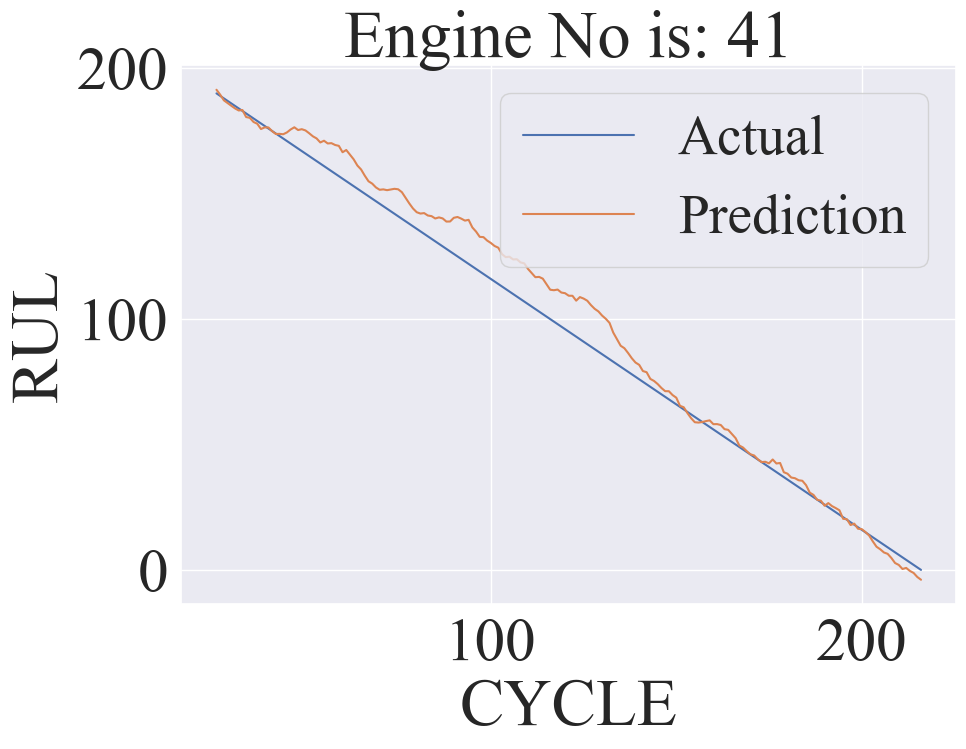

In [67]:
plt.figure(figsize=(10, 7))
plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
plt.plot(rev_trans[0],rev_trans[13])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.title('Engine No is: {}'.format(engine_id))
plt.legend([ 'Actual','Prediction'], loc='upper right', fontsize = 'small')
plt.show()
print('\n')

Shape of df for engine 27:  (156, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 3.0610895590696483


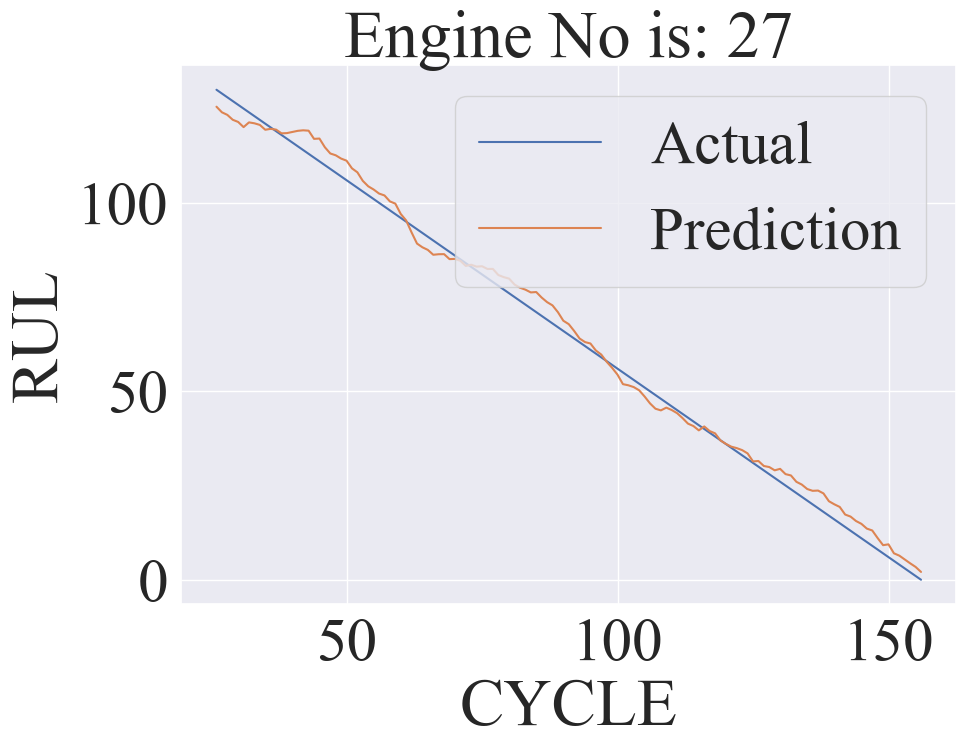



Shape of df for engine 19:  (158, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 3.5501877276208056


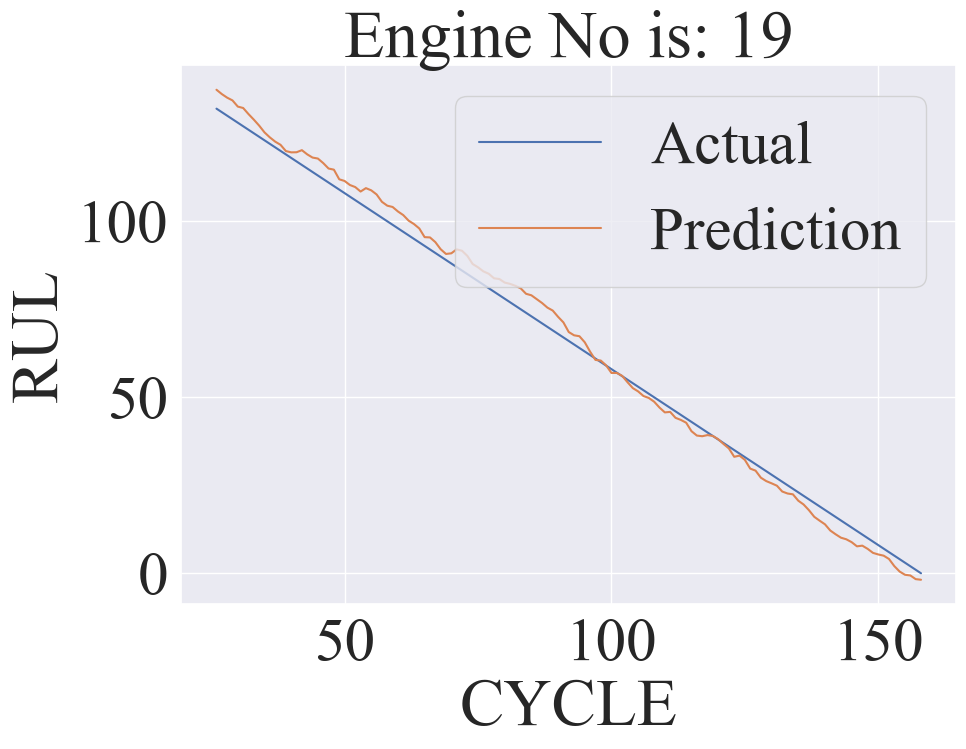



Shape of df for engine 11:  (240, 14)
7/7 [==============================] - 0s 3ms/step
RMSE on This set: 10.4988118552828


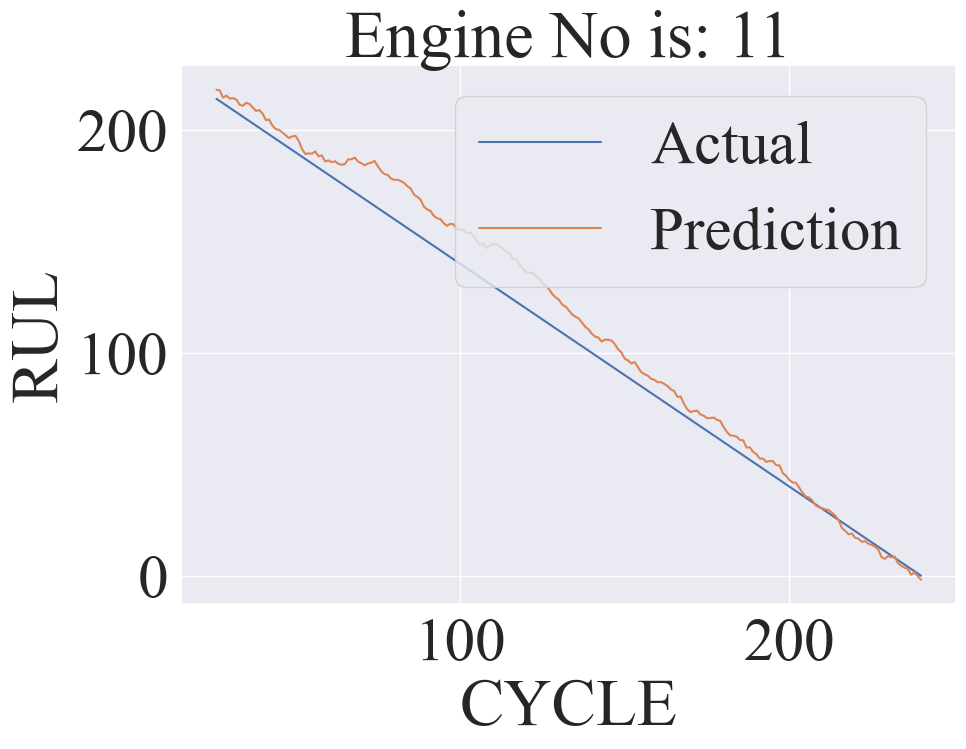



Shape of df for engine 15:  (207, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 14.977829058397159


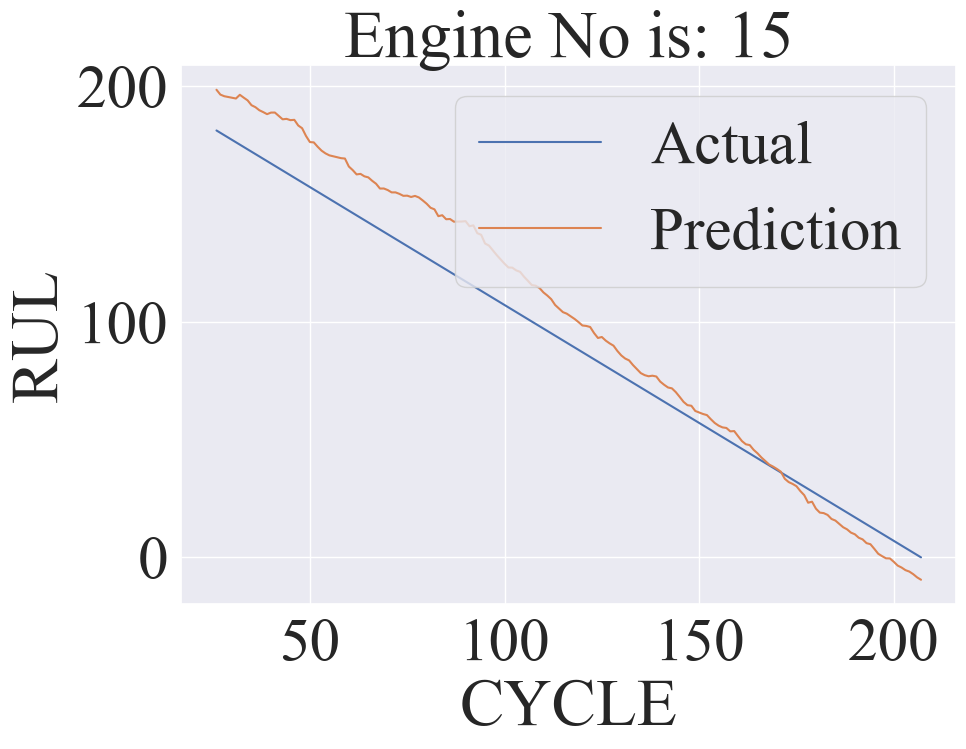



Shape of df for engine 40:  (188, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 11.481906477466037


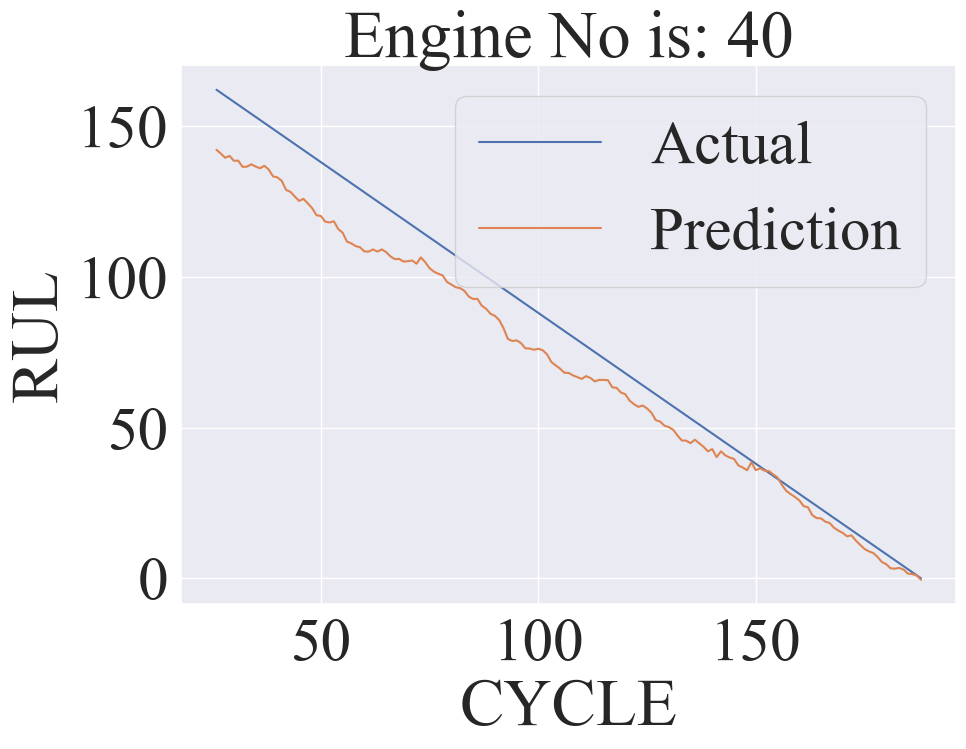



Shape of df for engine 29:  (163, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 8.632741591873046


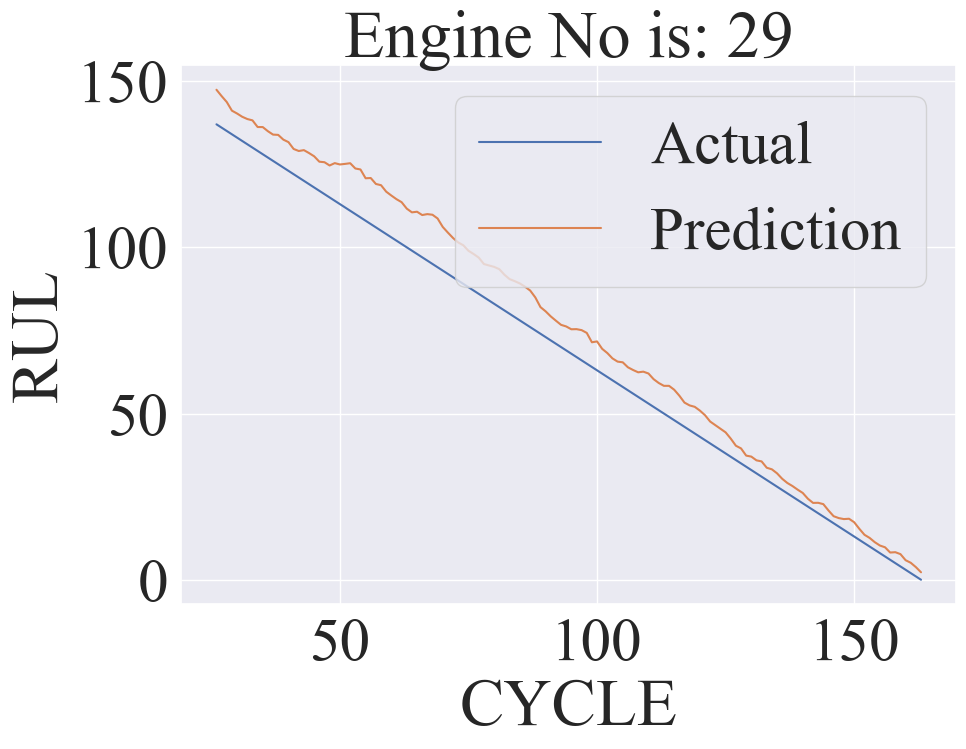



Shape of df for engine 9:  (201, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 11.522714627259392


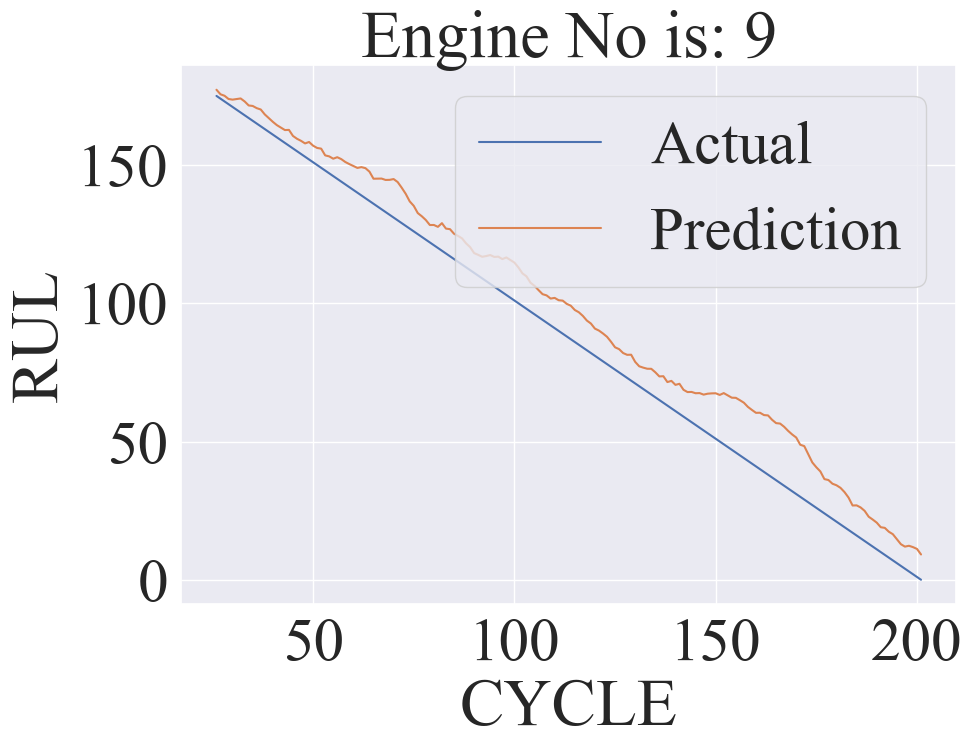



Shape of df for engine 20:  (234, 14)
7/7 [==============================] - 0s 2ms/step
RMSE on This set: 4.670356232167908


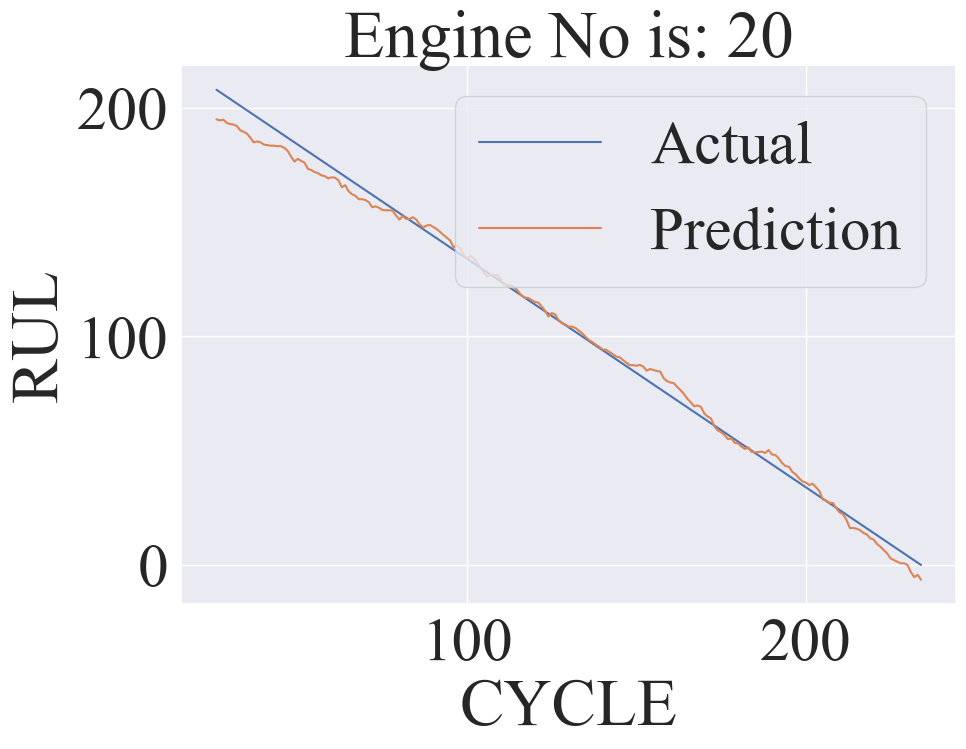



Shape of df for engine 1:  (192, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 9.466483000881247


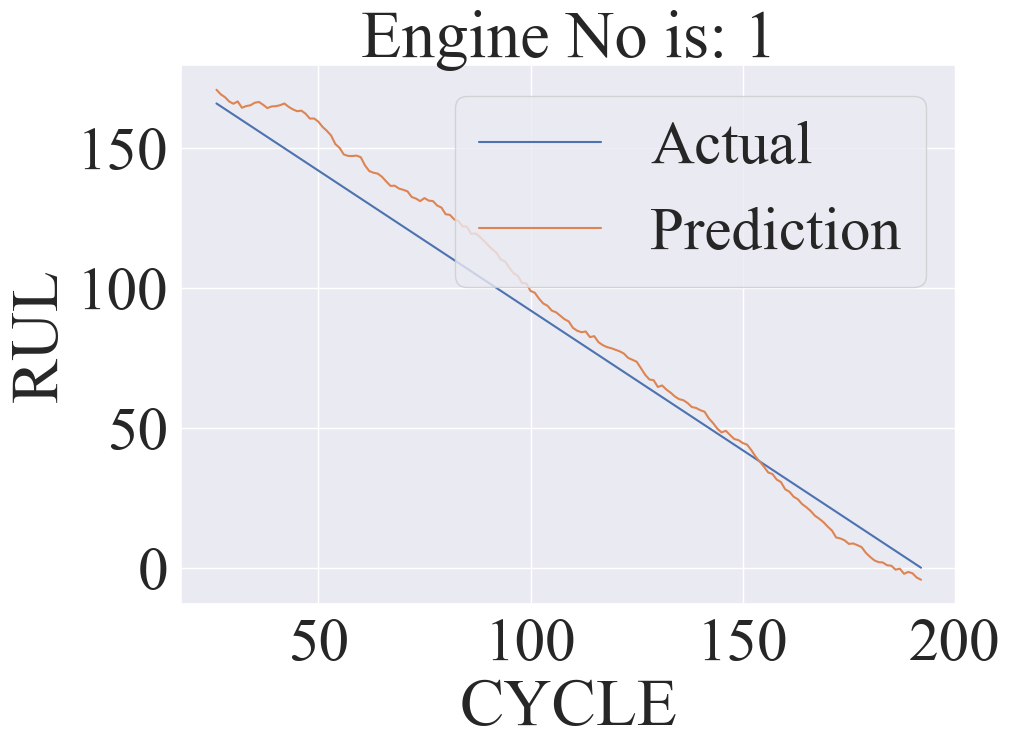



Shape of df for engine 12:  (170, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 2.0354283829553244


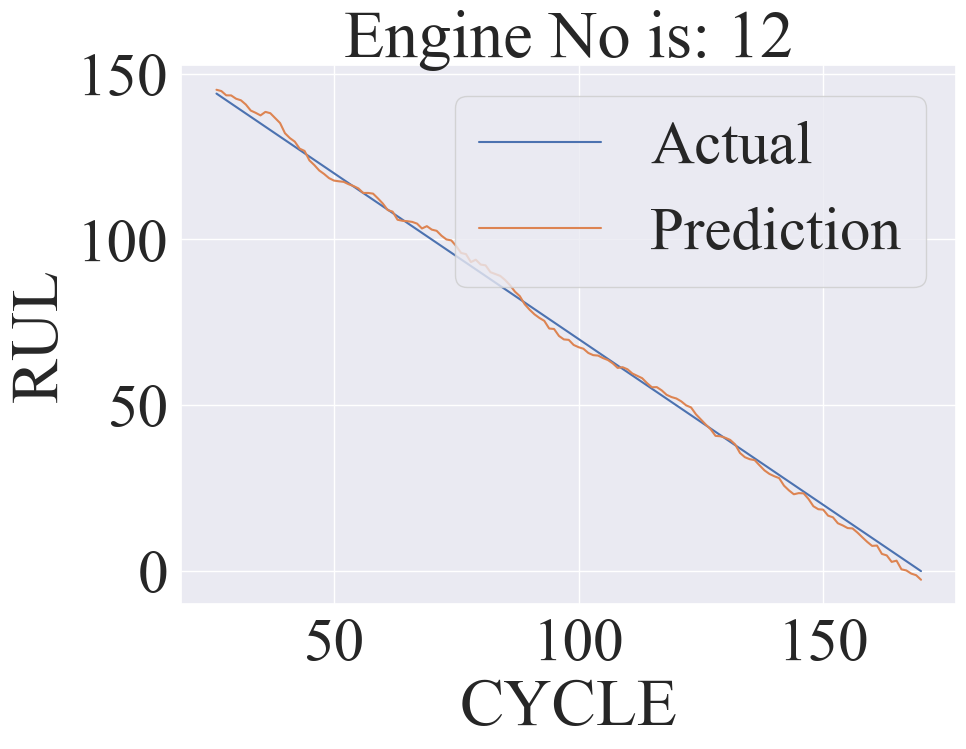



Shape of df for engine 7:  (259, 14)
8/8 [==============================] - 0s 2ms/step
RMSE on This set: 16.5479698595879


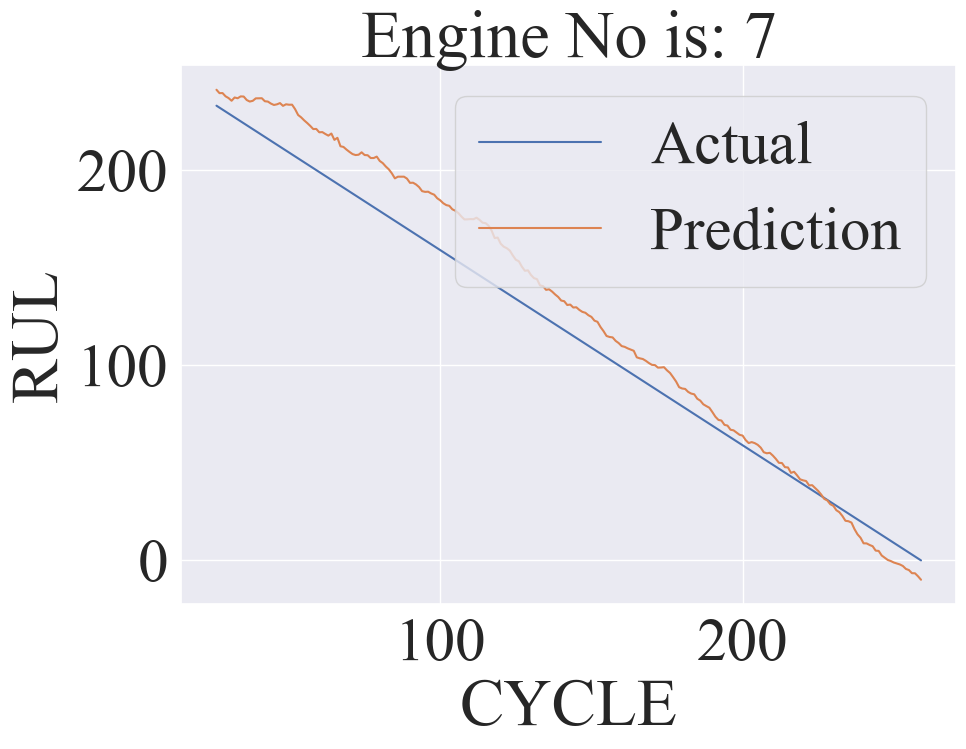



Shape of df for engine 27:  (156, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 3.0610895590696483


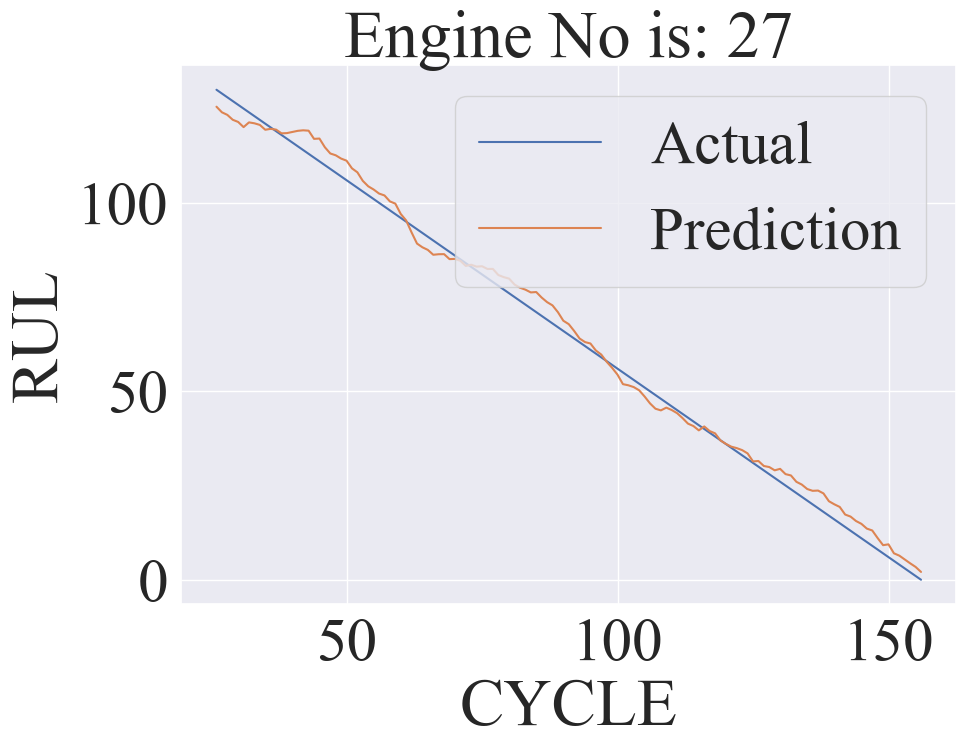



Shape of df for engine 5:  (269, 14)
8/8 [==============================] - 0s 2ms/step
RMSE on This set: 13.462647037862066


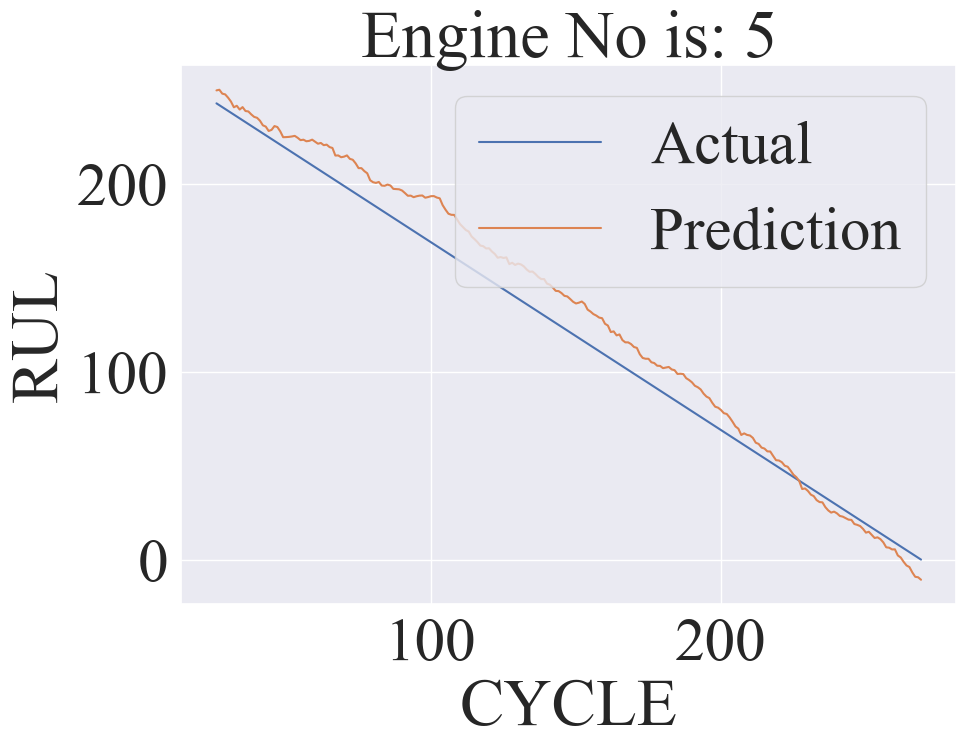



Shape of df for engine 29:  (163, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 8.632741591873046


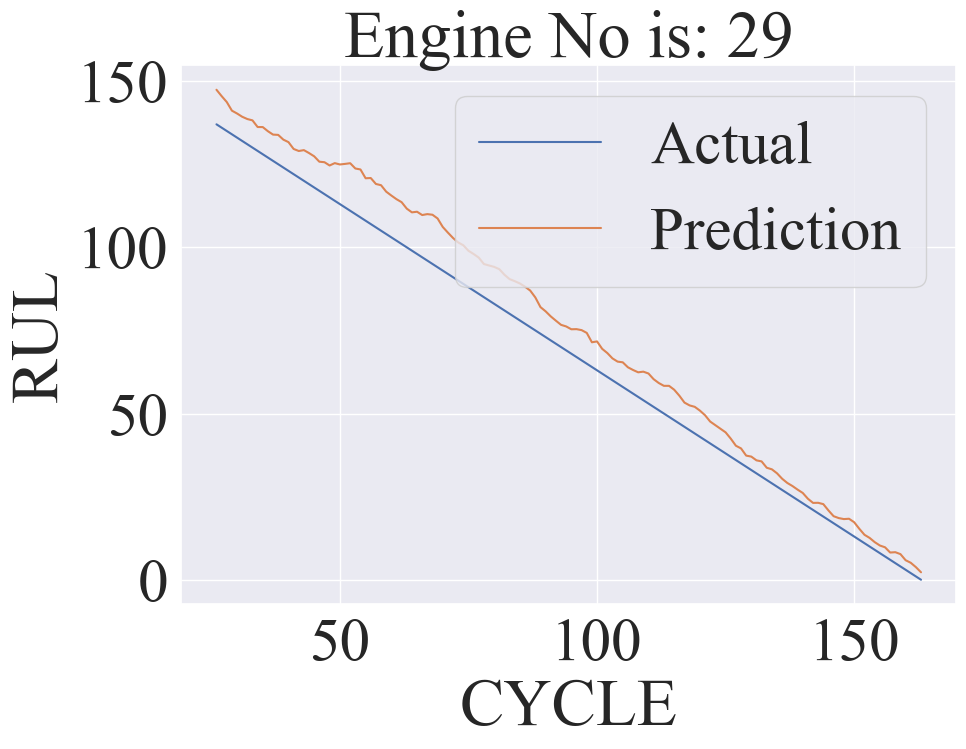



Shape of df for engine 27:  (156, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 3.0610895590696483


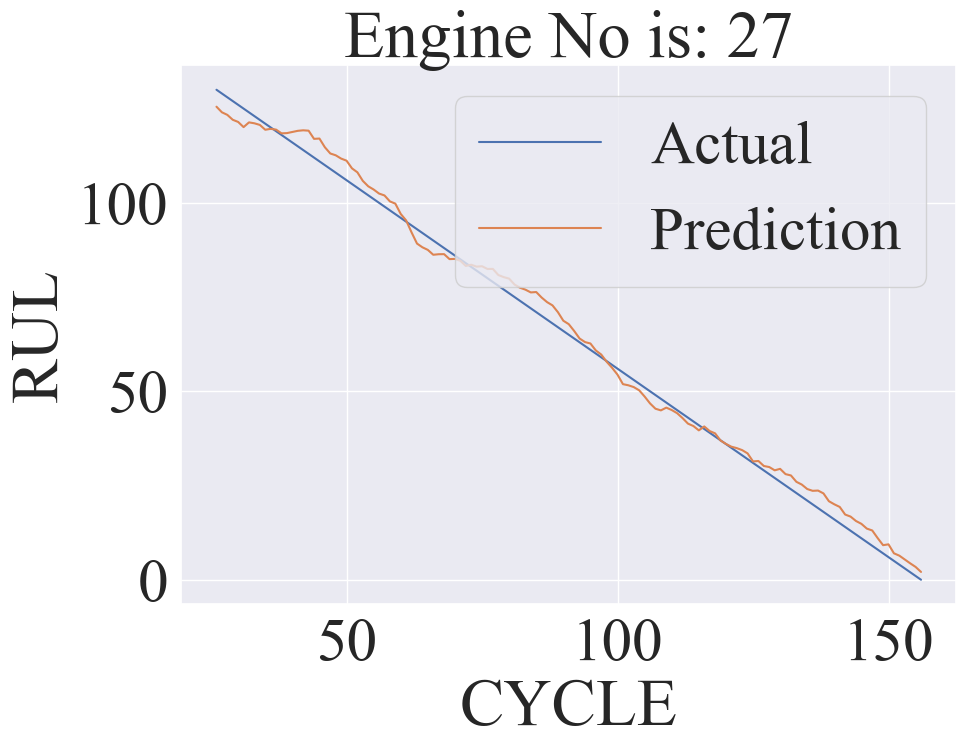



Shape of df for engine 34:  (195, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 10.971577933244554


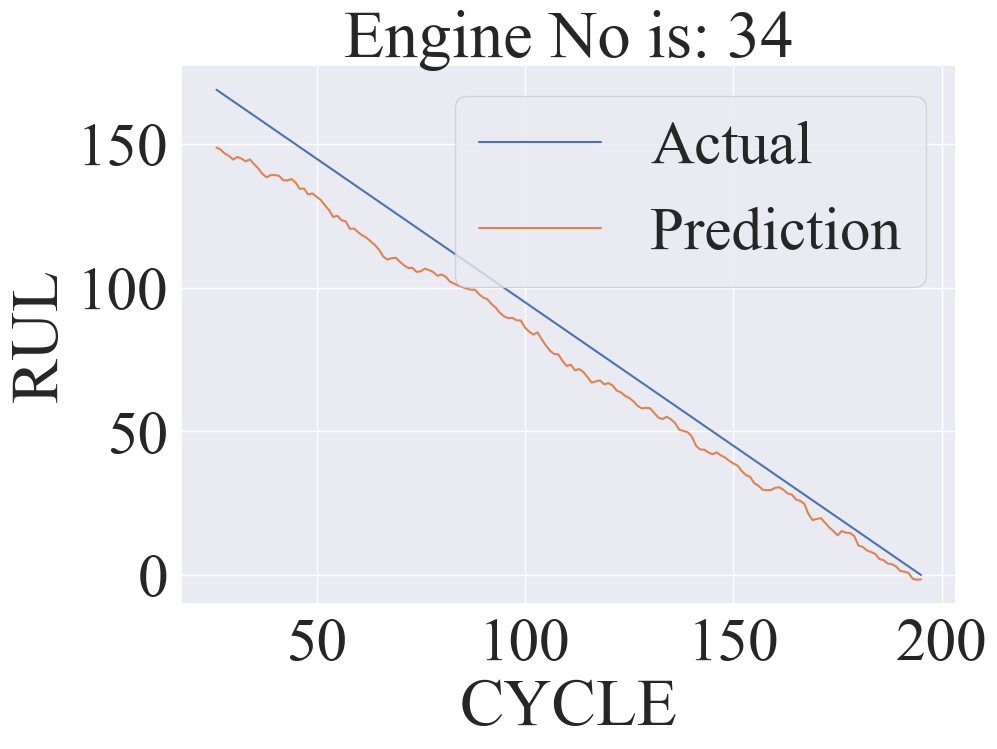



Shape of df for engine 25:  (230, 14)
7/7 [==============================] - 0s 1ms/step
RMSE on This set: 8.129937921196854


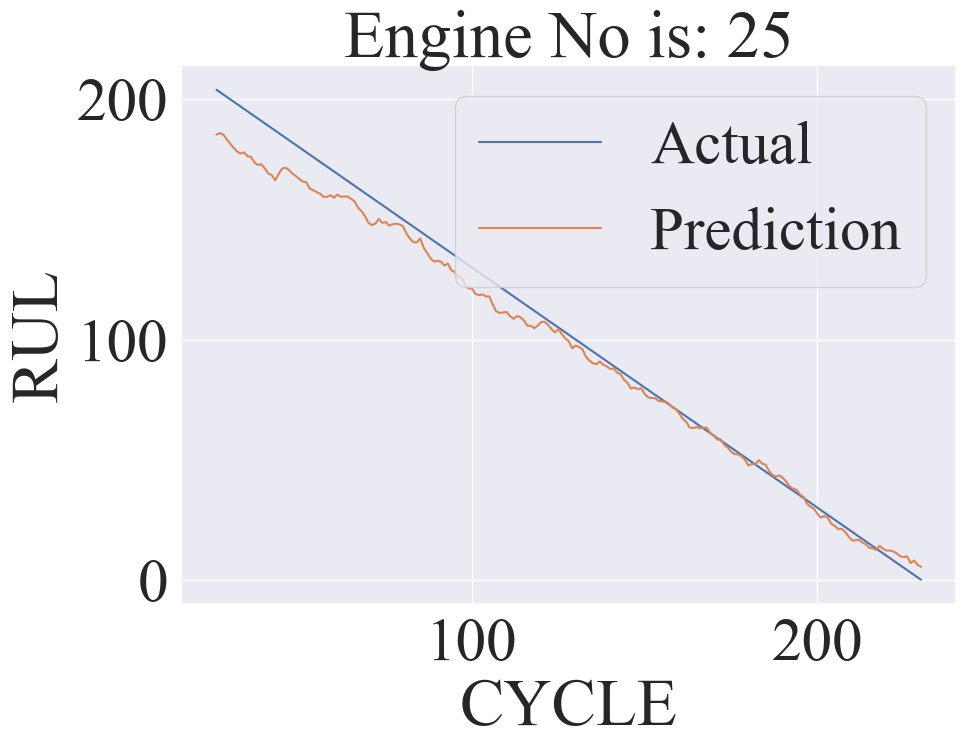



Shape of df for engine 12:  (170, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 2.0354283829553244


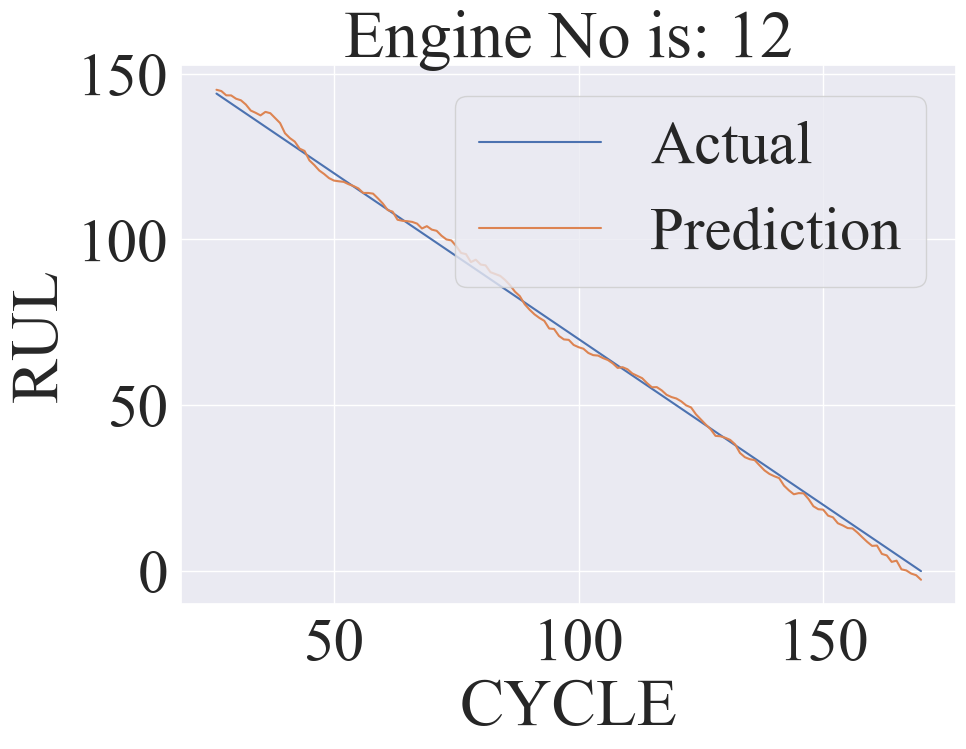



Shape of df for engine 21:  (195, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 10.7626070811658


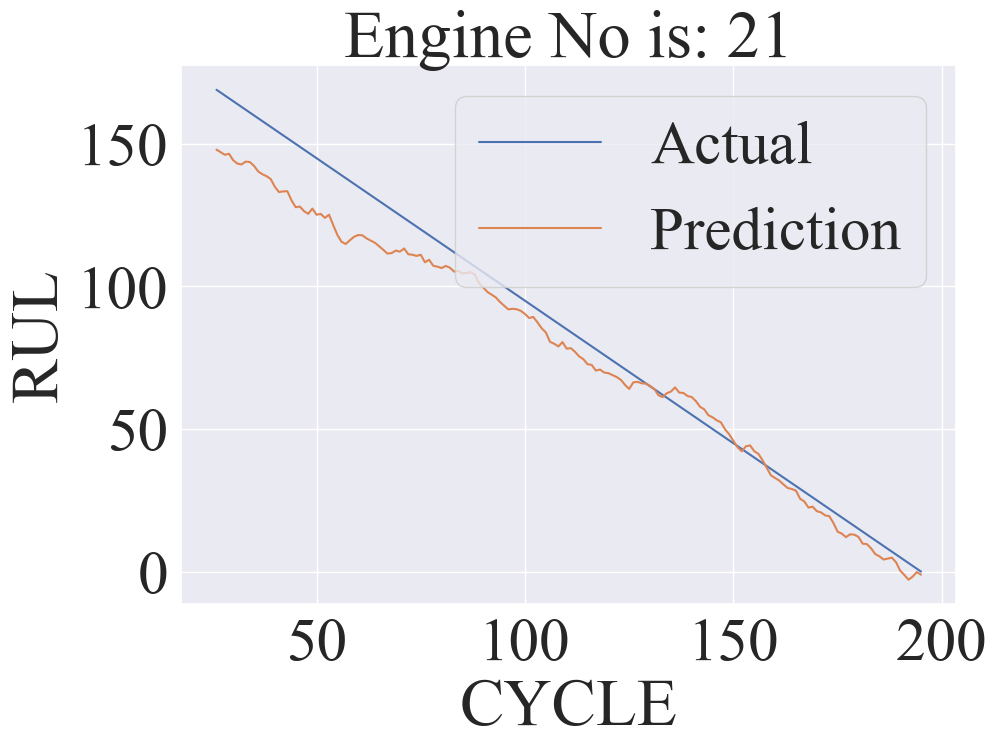



Shape of df for engine 14:  (180, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 10.02249442466459


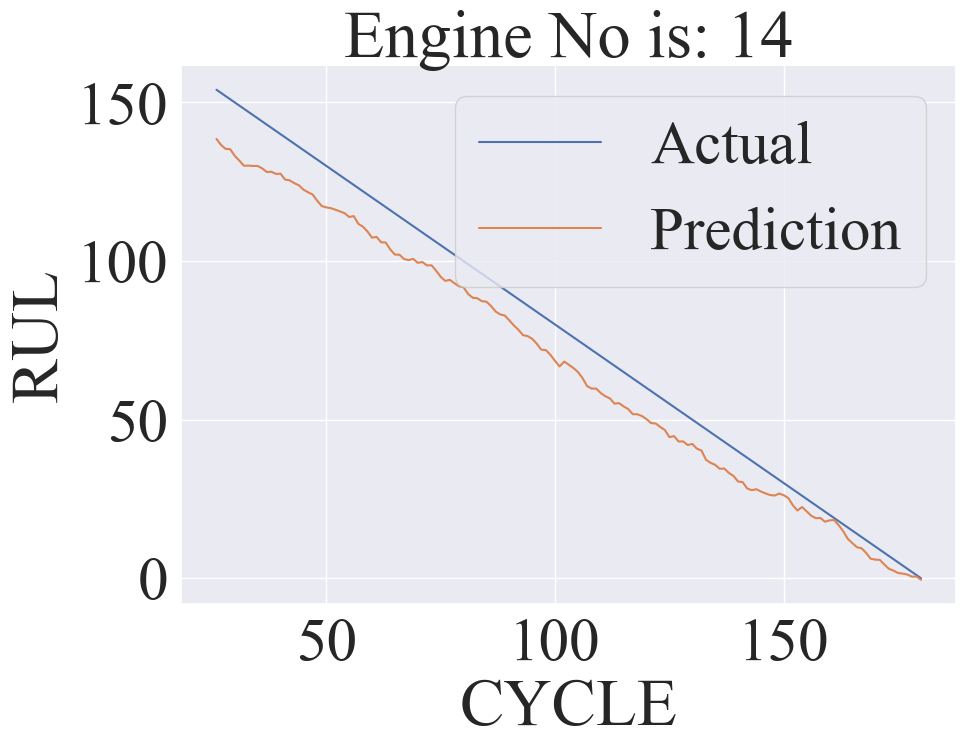



Shape of df for engine 1:  (192, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 9.466483000881247


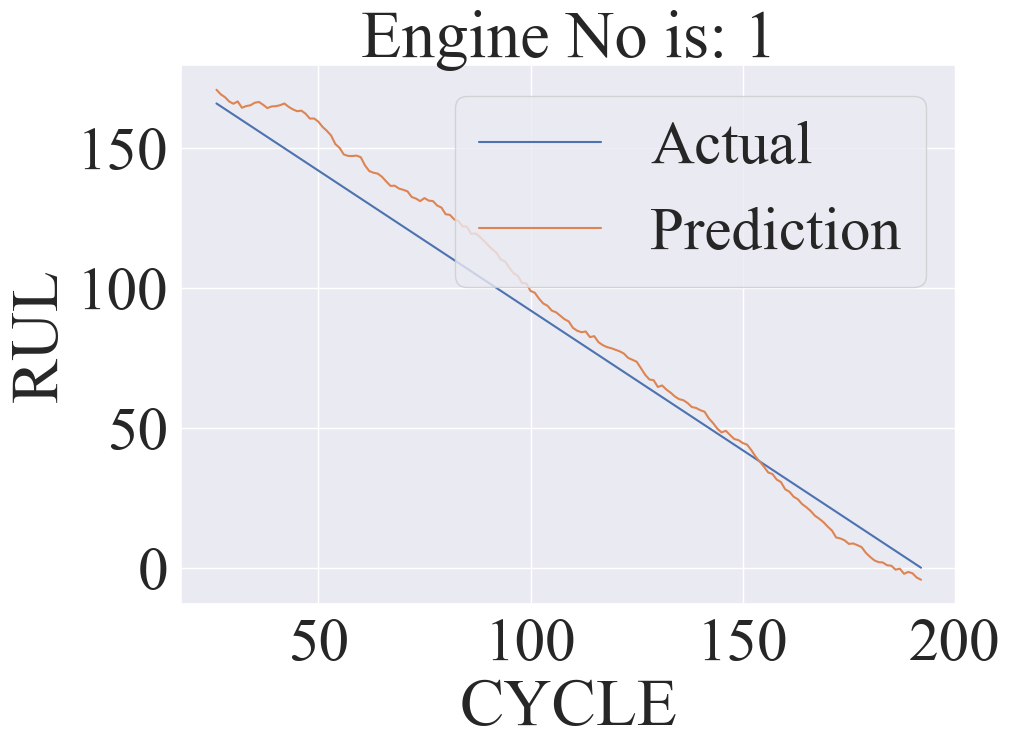



Shape of df for engine 25:  (230, 14)
7/7 [==============================] - 0s 2ms/step
RMSE on This set: 8.129937921196854


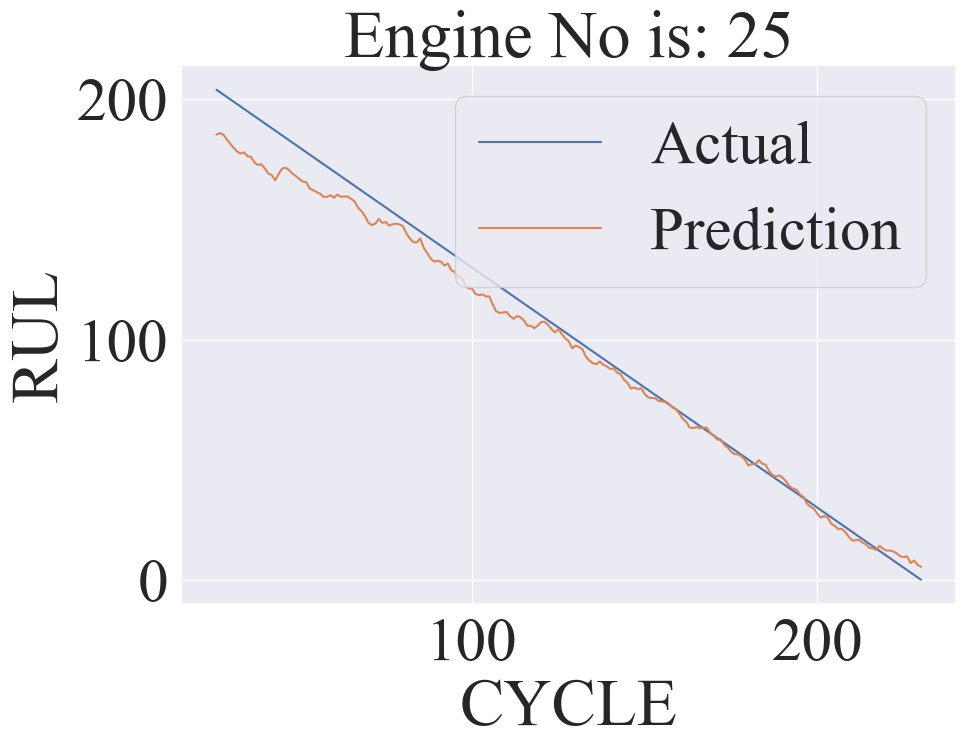



Shape of df for engine 35:  (181, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 7.019479703483934


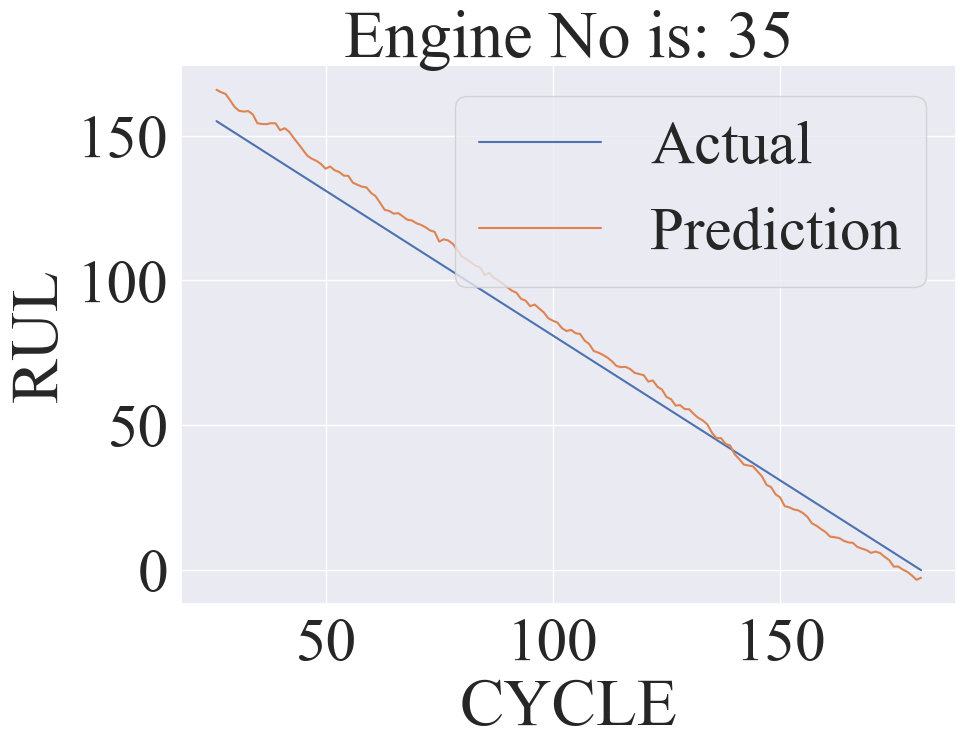



Shape of df for engine 25:  (230, 14)
7/7 [==============================] - 0s 2ms/step
RMSE on This set: 8.129937921196854


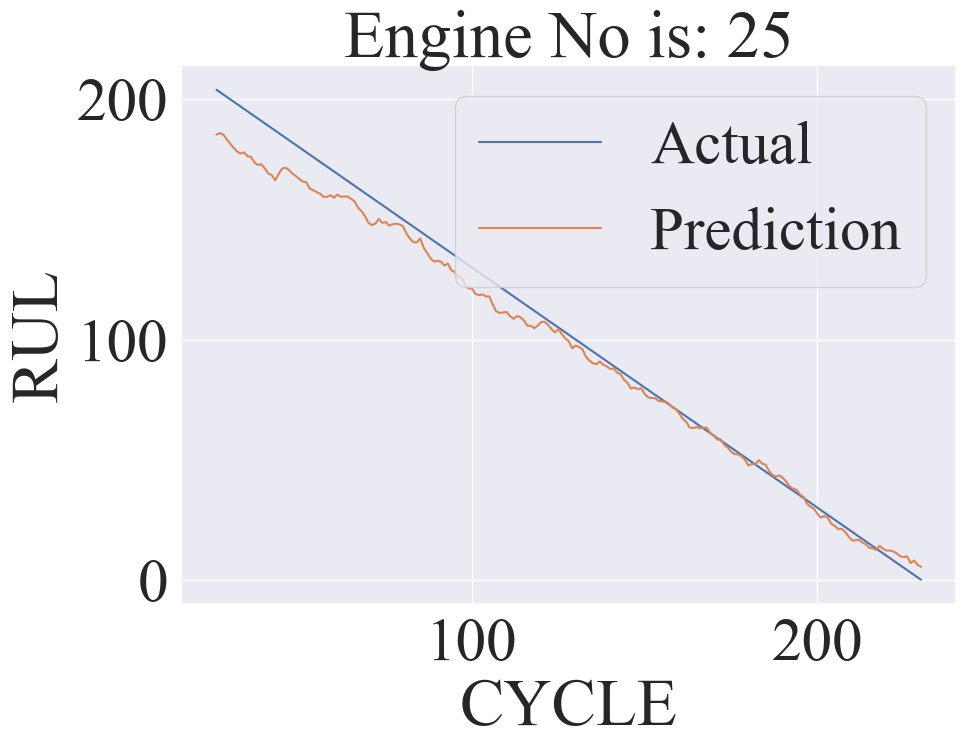



Shape of df for engine 46:  (256, 14)
8/8 [==============================] - 0s 2ms/step
RMSE on This set: 11.994402229871662


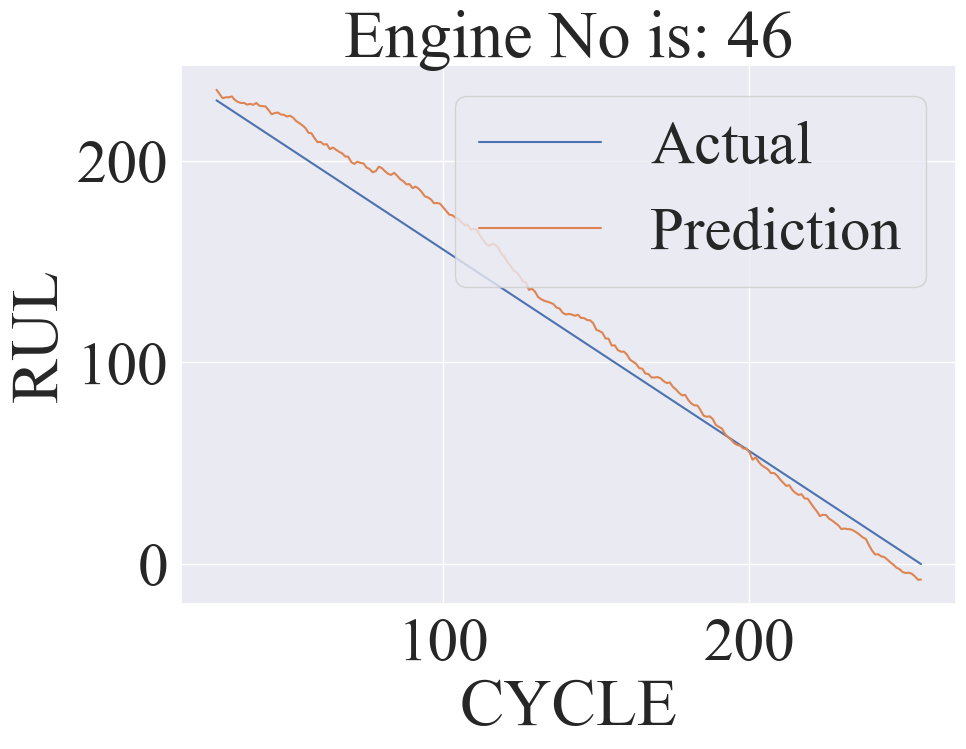

In [69]:
Train_no=1

m = np.random.randint(low=1,high=50,size=25) 

for i in m:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.figure(figsize=(10, 7))
    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_id))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

In [78]:
file_no=4                      # Give the sl.no of the Test_file [1,2,3,4]
######################################
raw_data = pd.read_csv('test_FD00{}.txt'.format(file_no), sep=' ', header = None)
raw_data = raw_data.drop([26,27], axis='columns')
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']

#######################################
given_no_of_cycles=[]
for i in range (1,len(raw_data['ID'].unique())+1):
    given_no_of_cycles.append(len(raw_data[raw_data['ID']==i])) 
given_no_of_cycles=np.array(given_no_of_cycles).reshape([len(given_no_of_cycles),1])  
########################################
cycle_ran_after = pd.read_csv('RUL_FD00{}.txt'.format(file_no), sep=' ', header = None)
cycle_ran_after=cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)
########################################
EOL=[]
for i in raw_data['ID']:
        EOL.append(given_no_of_cycles[i-1]+cycle_ran_after[i-1] )   
EOL = np.array(EOL).reshape([len(EOL),1]) 
#######################################
raw_data['EOL']=EOL
raw_data["RUL"] = raw_data["EOL"]-raw_data["Cycle"]
raw_data=raw_data.drop(columns=['ID','EOL'])
raw_data=raw_data.drop(columns=delete_columns)
#######################################

In [79]:
raw_data

Cycle  SensorMeasure2  SensorMeasure3  SensorMeasure4  SensorMeasure7  \
0          1          606.67         1481.04         1227.81          332.52   
1          2          536.22         1256.17         1031.48          174.46   
2          3          549.23         1340.13         1105.88          137.34   
3          4          549.19         1339.70         1107.26          137.23   
4          5          555.10         1353.04         1117.80          192.94   
...      ...             ...             ...             ...             ...   
41209    277          550.30         1364.40         1129.17          138.34   
41210    278          608.00         1494.75         1260.88          334.75   
41211    279          555.92         1370.65         1130.97          194.92   
41212    280          608.19         1489.11         1256.25          333.15   
41213    281          556.40         1378.58         1140.70          194.26   

       SensorMeasure8  SensorMeasure11  SensorMeasure12  SensorMeasure13  \
0             2323.67            43.83           313.03          2387.78   
1             1915.21            36.11           163.61          2028.09   
2             2211.93            41.52           129.98          2387.95   
3             2211.89            41.73           129.48          2387.90   
4             2222.71            41.32           181.82          2387.87   
...               ...              ...              ...              ...   
41209         2212.35            42.30           130.87          2388.50   
41210         2324.23            44.53           314.51          2388.33   
41211         2223.57            42.33           182.76          2388.64   
41212         2324.19            44.78           314.17          2388.37   
41213         2223.50            42.08           181.88          2388.59   

       SensorMeasure15  SensorMeasure17  SensorMeasure20  SensorMeasure21  RUL  
0               9.2229              362            24.31          14.7007  251  
1              10.8632              306            14.36           8.5748  250  
2               9.3960              328            10.39           6.4365  249  
3               9.3594              328            10.56           6.2367  248  
4               9.3030              333            14.85           8.9326  247  
...                ...              ...              ...              ...  ...  
41209           9.4427              331            10.53           6.2620   30  
41210           9.2772              366            24.33          14.6486   29  
41211           9.3982              336            14.69           8.8389   28  
41212           9.2727              366            24.44          14.6887   27  
41213           9.3964              335            14.72           8.8502   26  

[41214 rows x 14 columns]

In [80]:
raw_data.to_csv('Processed_Test_00{}.csv'.format(file_no), index=None)

Shape of df for engine 51:  (213, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 11.026680889100026


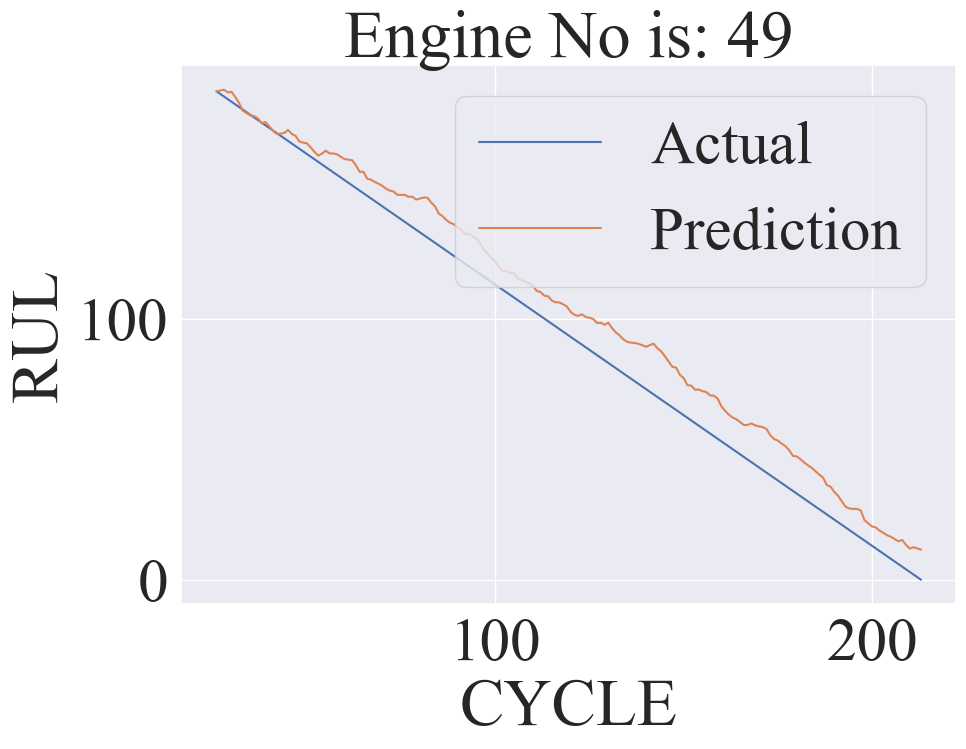



Shape of df for engine 96:  (336, 14)
10/10 [==============================] - 0s 2ms/step
RMSE on This set: 7.596709973312336


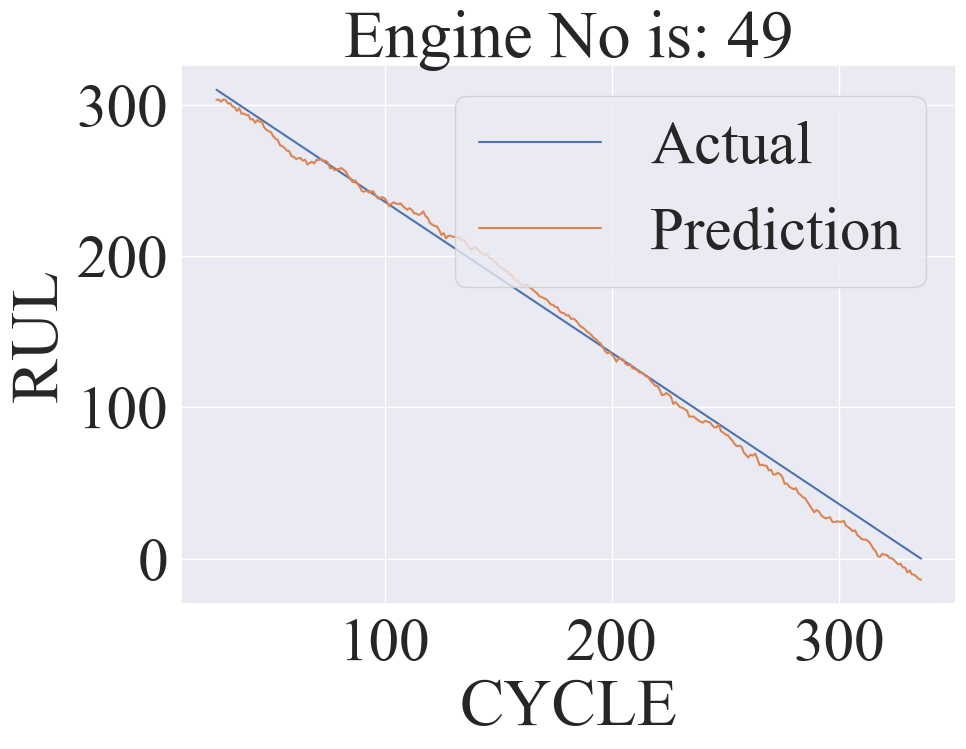



Shape of df for engine 68:  (199, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 7.794665585126999


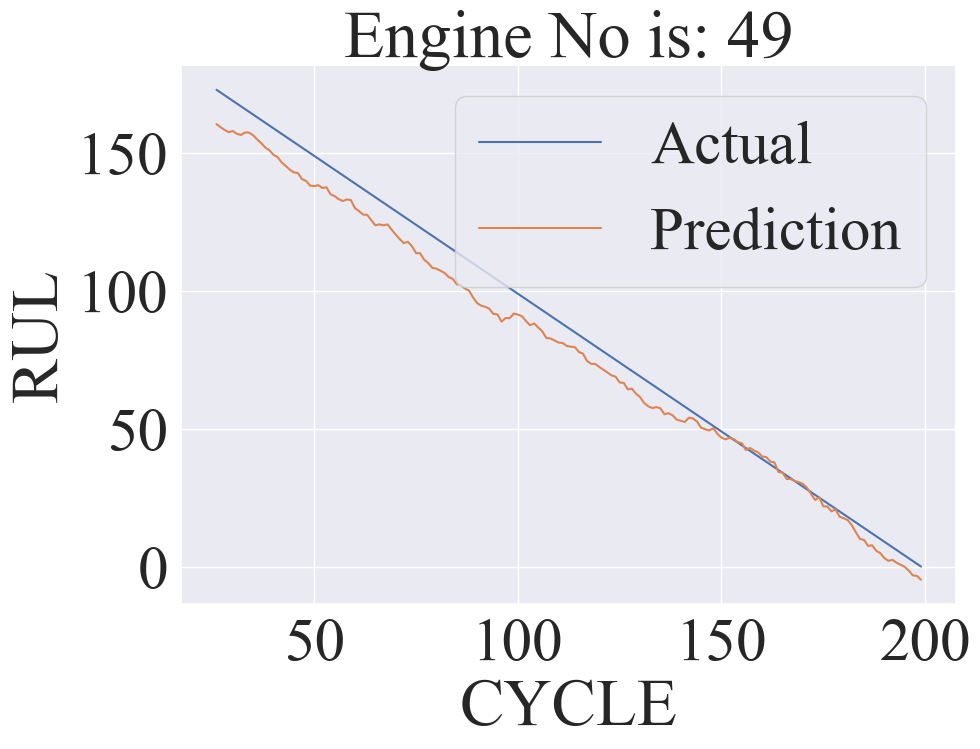



Shape of df for engine 96:  (336, 14)
10/10 [==============================] - 0s 2ms/step
RMSE on This set: 7.596709973312336


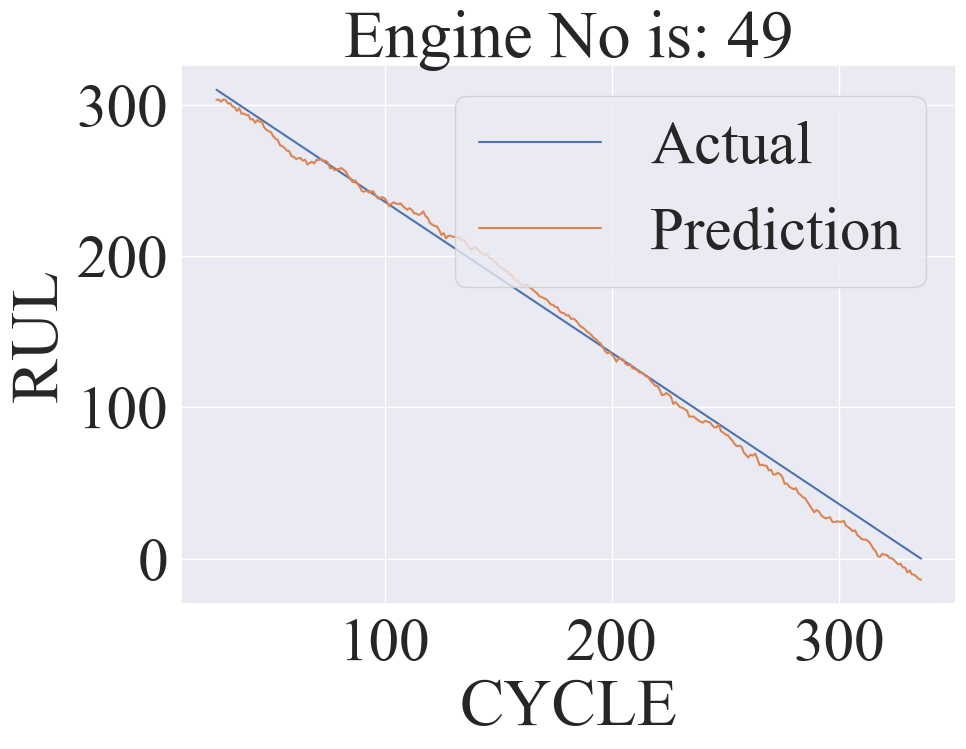



Shape of df for engine 52:  (213, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 4.513062713774114


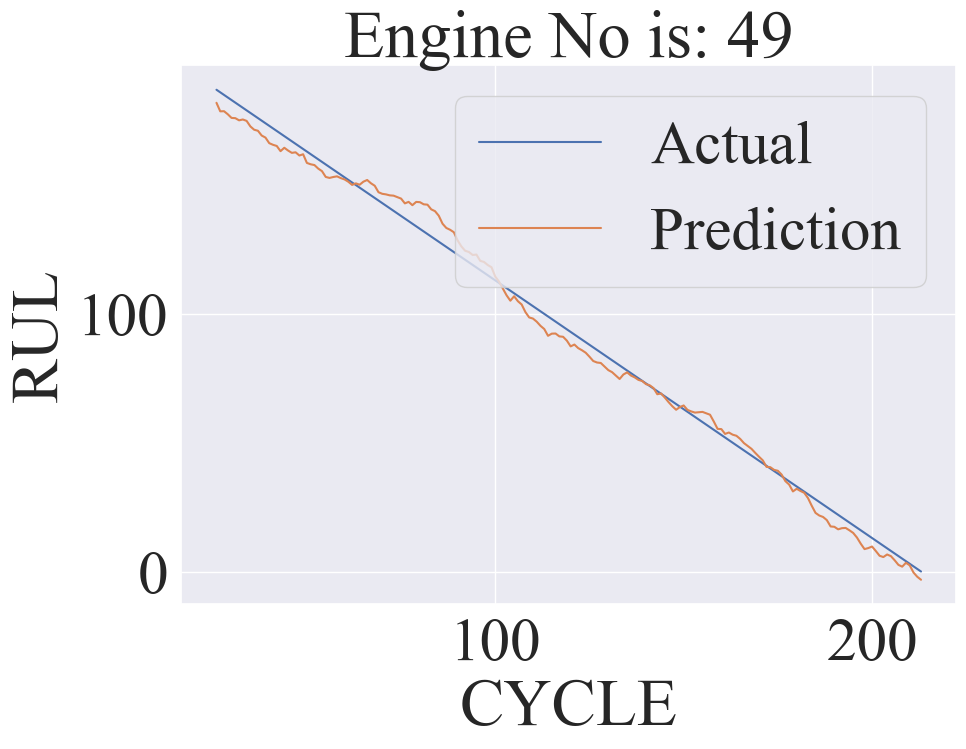



Shape of df for engine 82:  (214, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 5.773087862565821


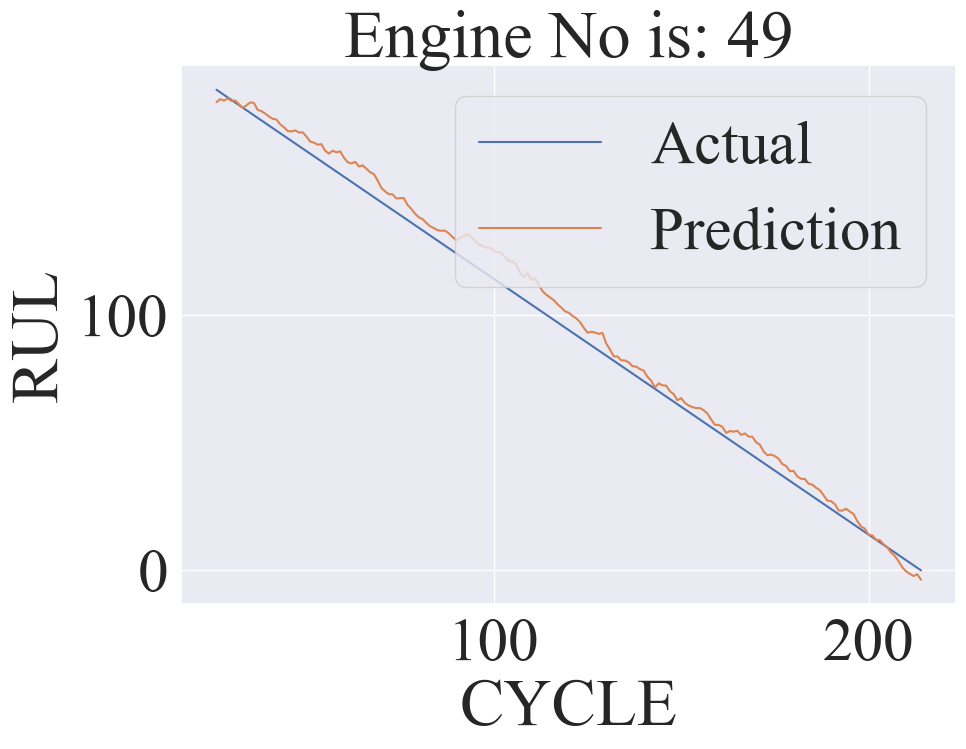



Shape of df for engine 80:  (185, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 10.46954158190826


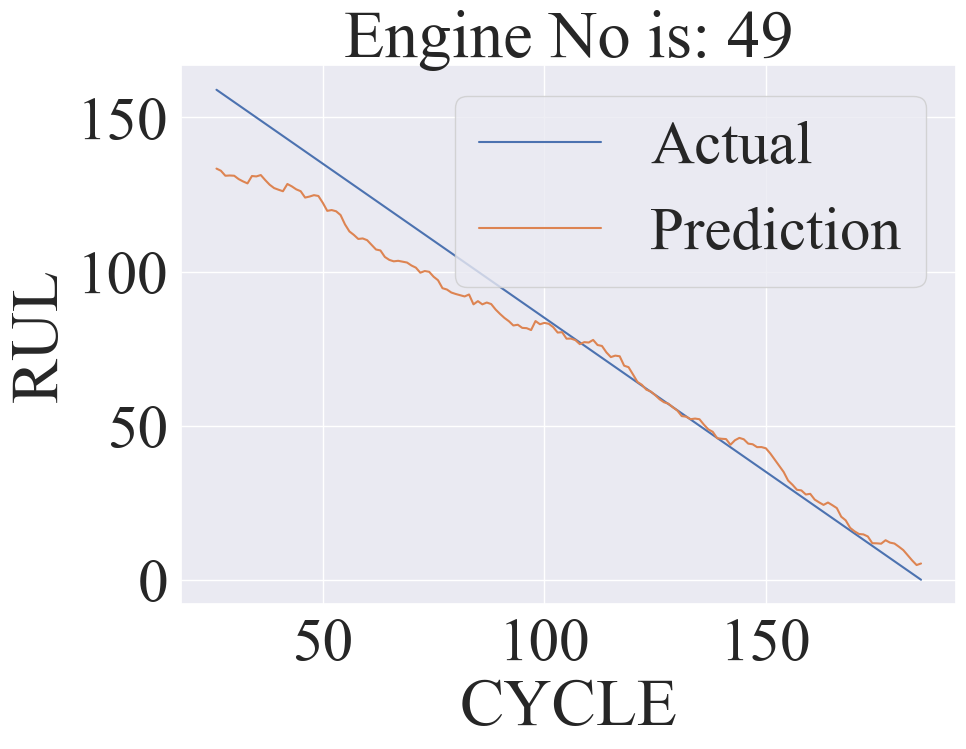



Shape of df for engine 54:  (257, 14)
8/8 [==============================] - 0s 2ms/step
RMSE on This set: 7.792615400274527


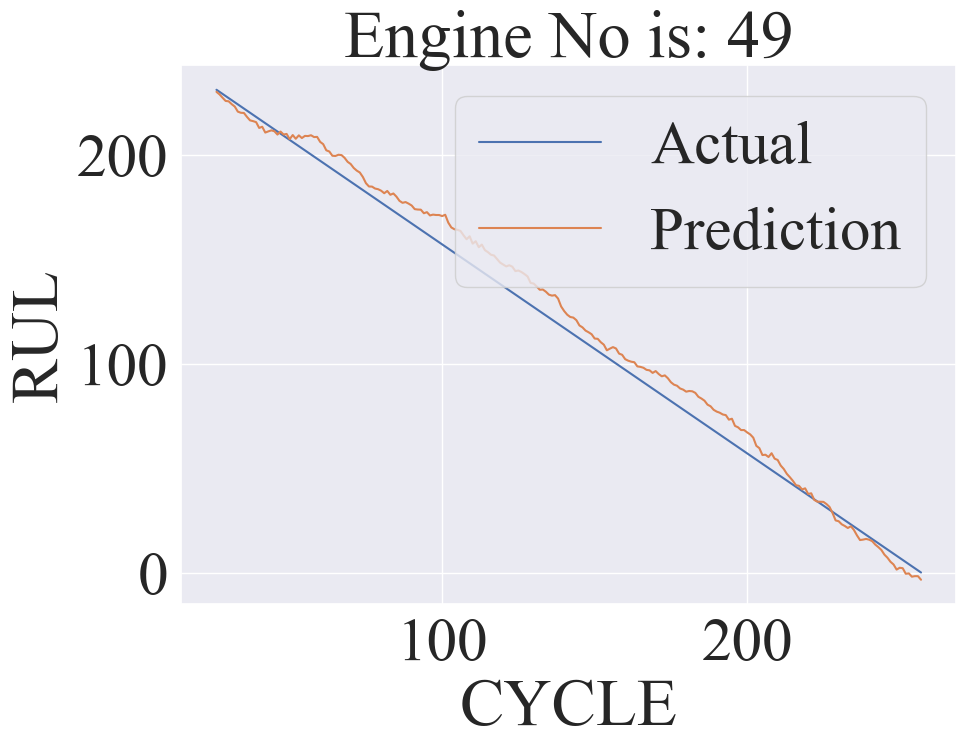



Shape of df for engine 74:  (166, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 15.775790387246316


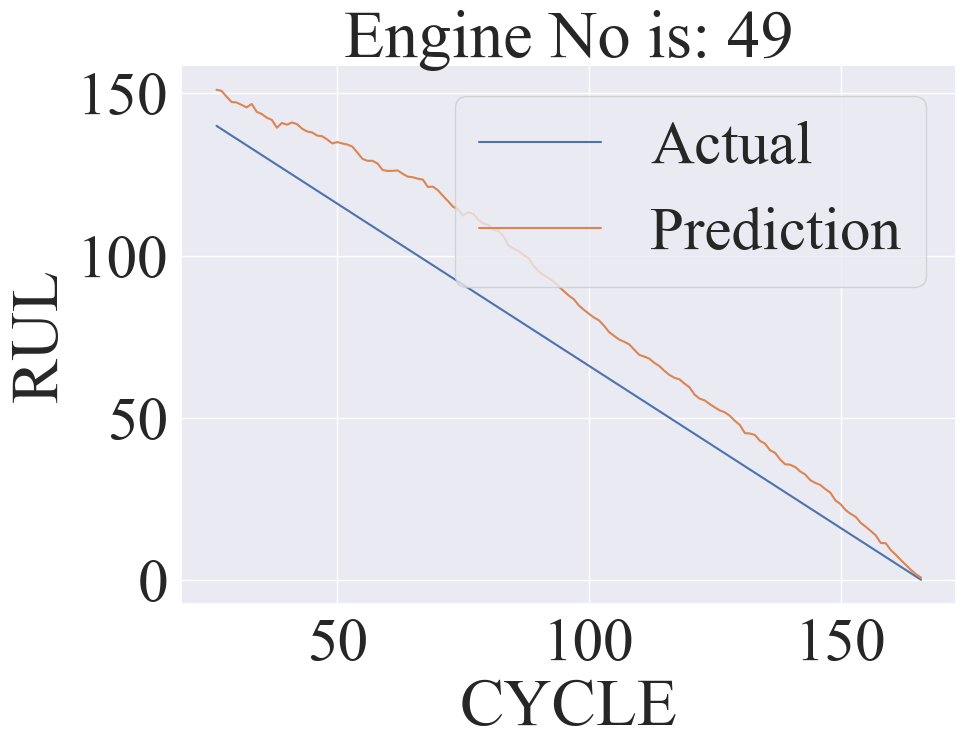



Shape of df for engine 78:  (231, 14)
7/7 [==============================] - 0s 2ms/step
RMSE on This set: 12.276587003210556


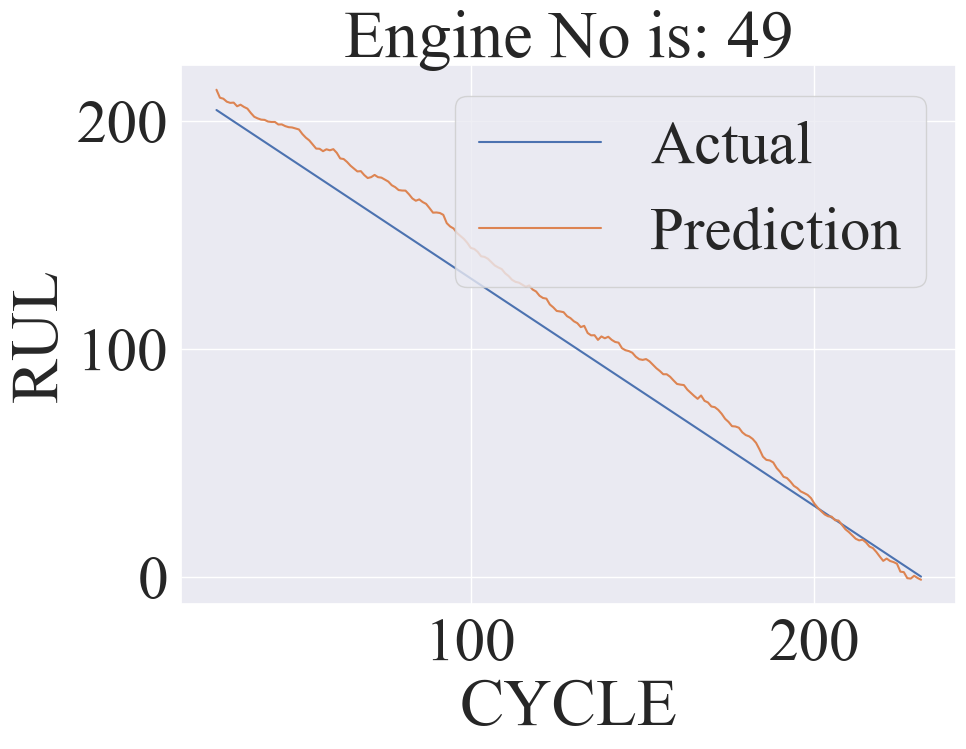



Shape of df for engine 89:  (217, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 11.754718043774853


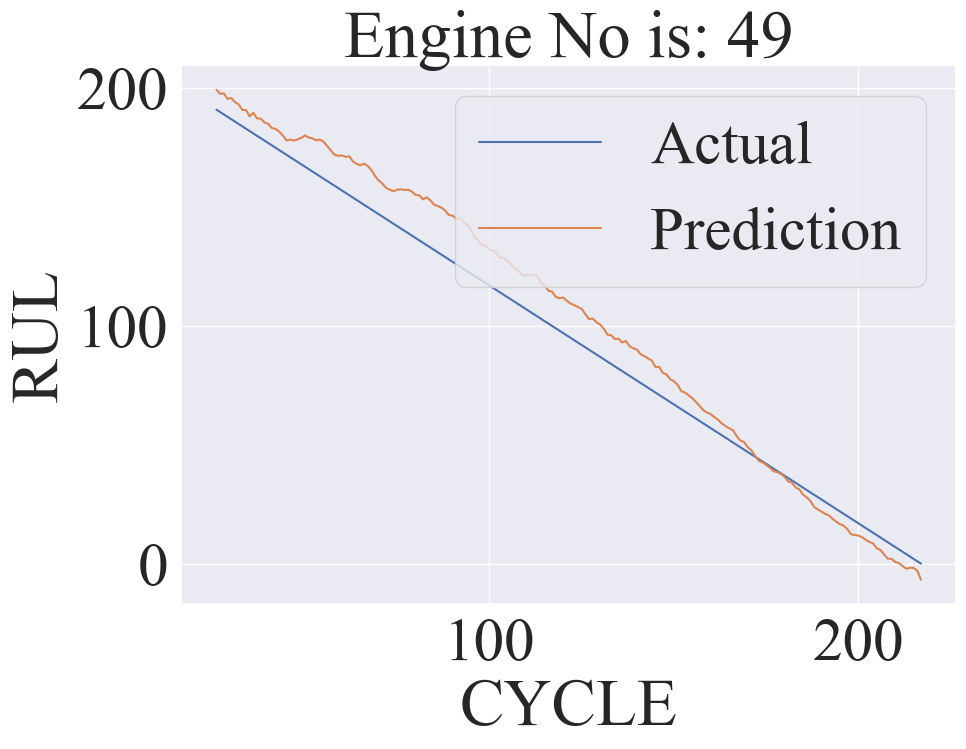



Shape of df for engine 92:  (341, 14)
10/10 [==============================] - 0s 2ms/step
RMSE on This set: 12.652928085686163


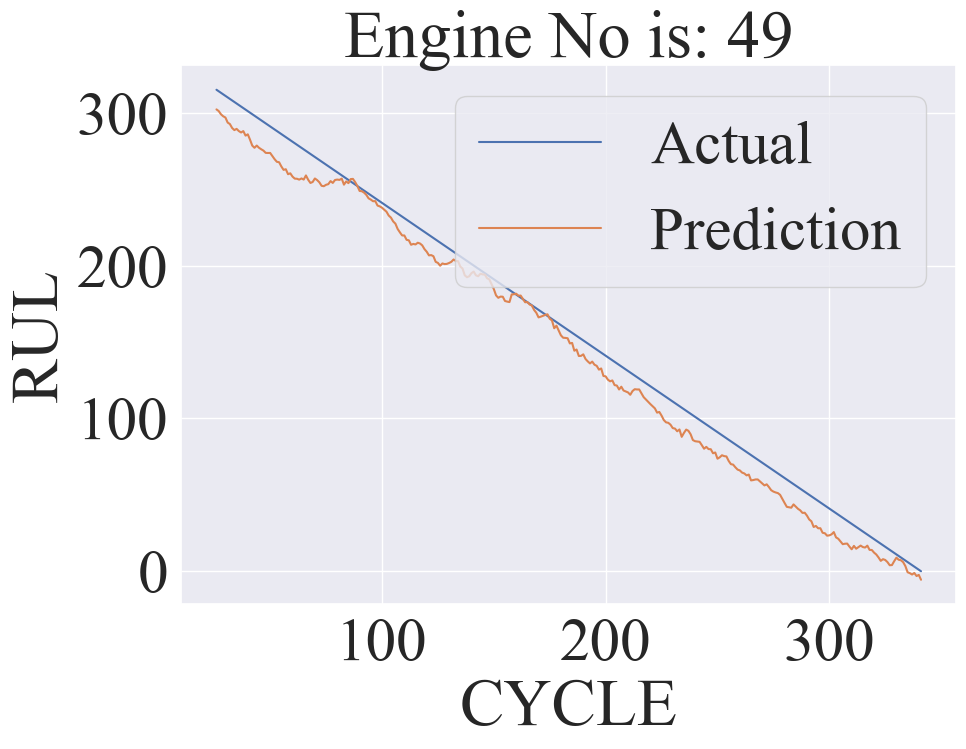



Shape of df for engine 92:  (341, 14)
10/10 [==============================] - 0s 2ms/step
RMSE on This set: 12.652928085686163


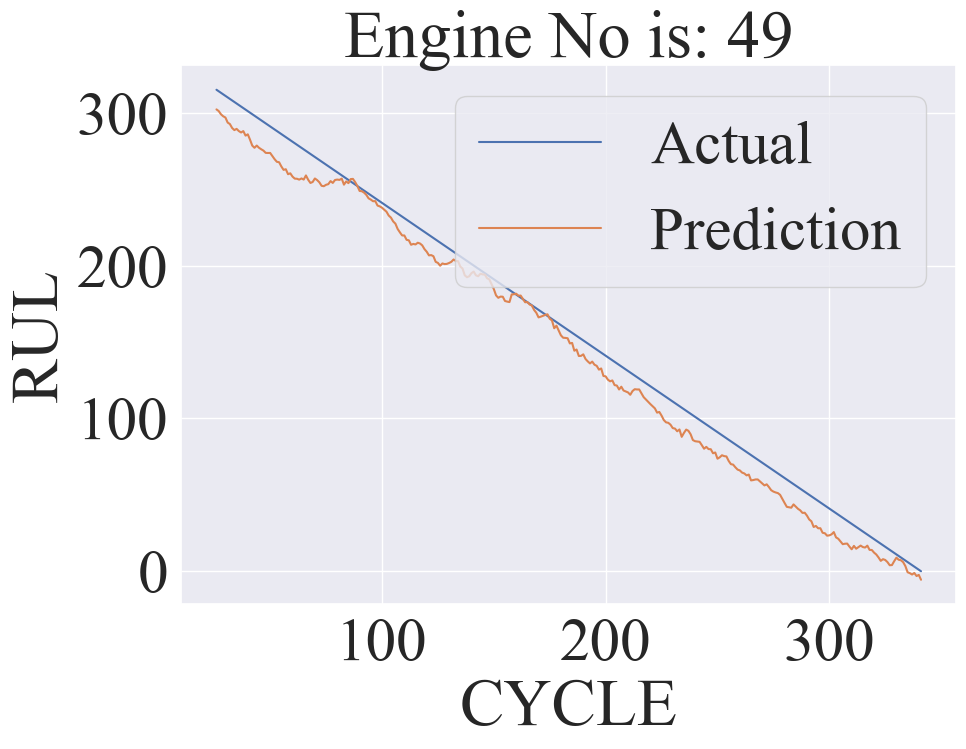



Shape of df for engine 71:  (208, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 8.937631668547892


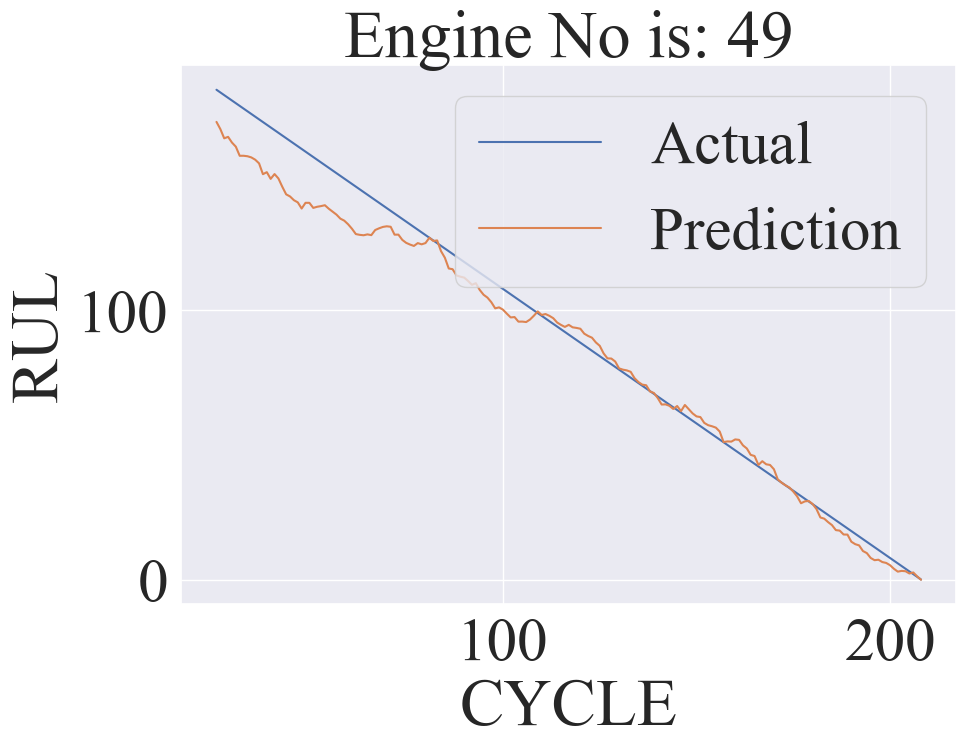



Shape of df for engine 67:  (313, 14)
9/9 [==============================] - 0s 3ms/step
RMSE on This set: 7.555845307301074


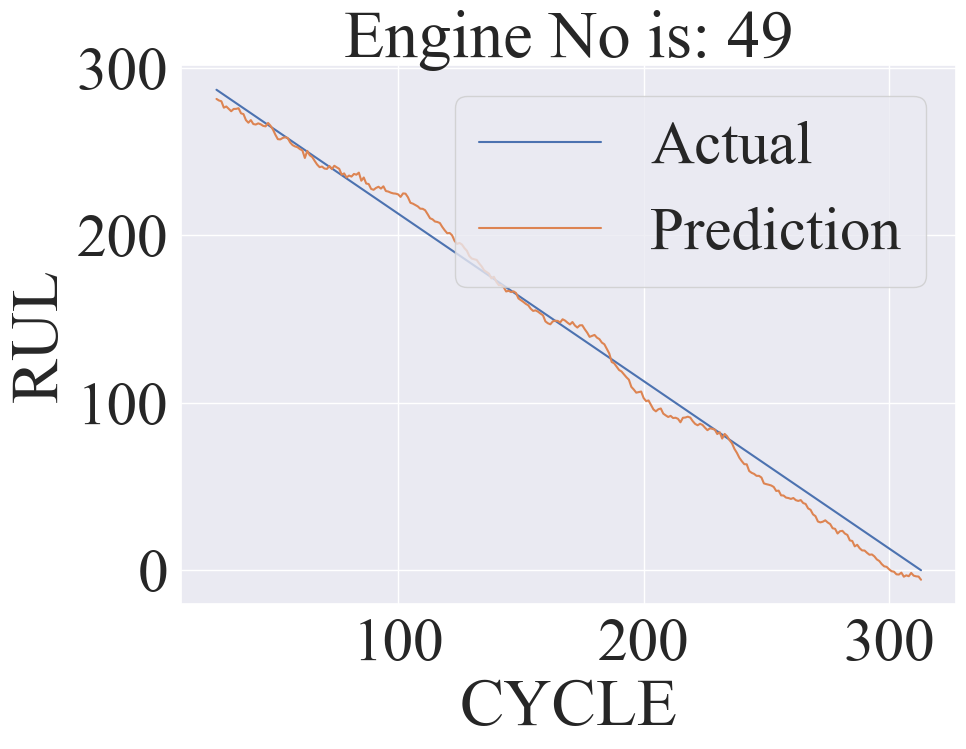



Shape of df for engine 74:  (166, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 15.775790387246316


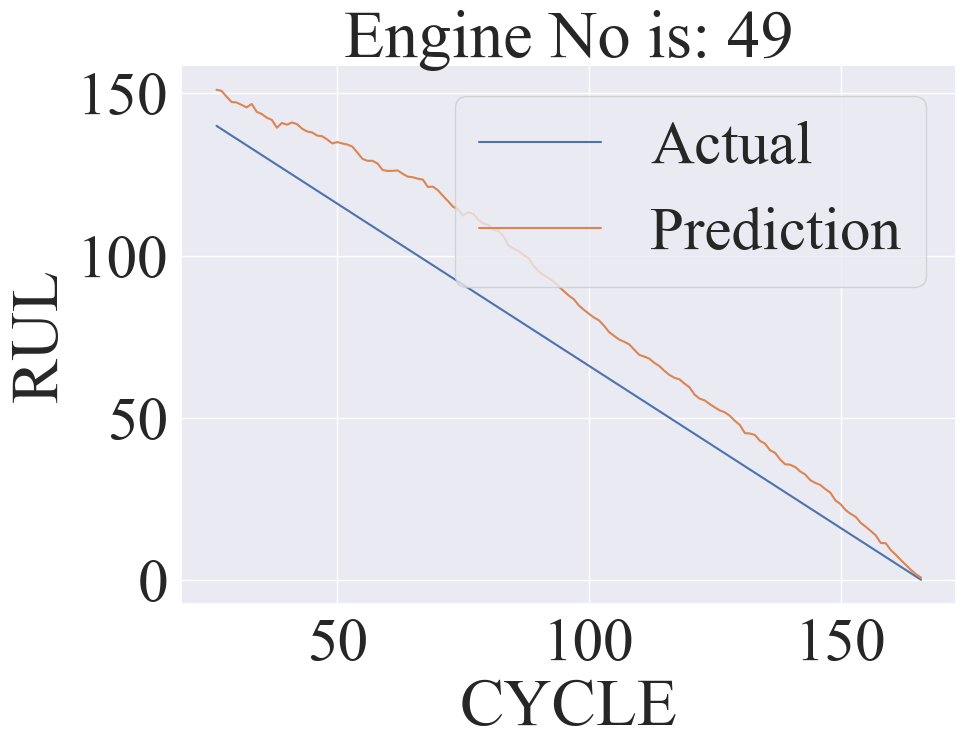



Shape of df for engine 69:  (362, 14)
11/11 [==============================] - 0s 2ms/step
RMSE on This set: 6.543196464917546


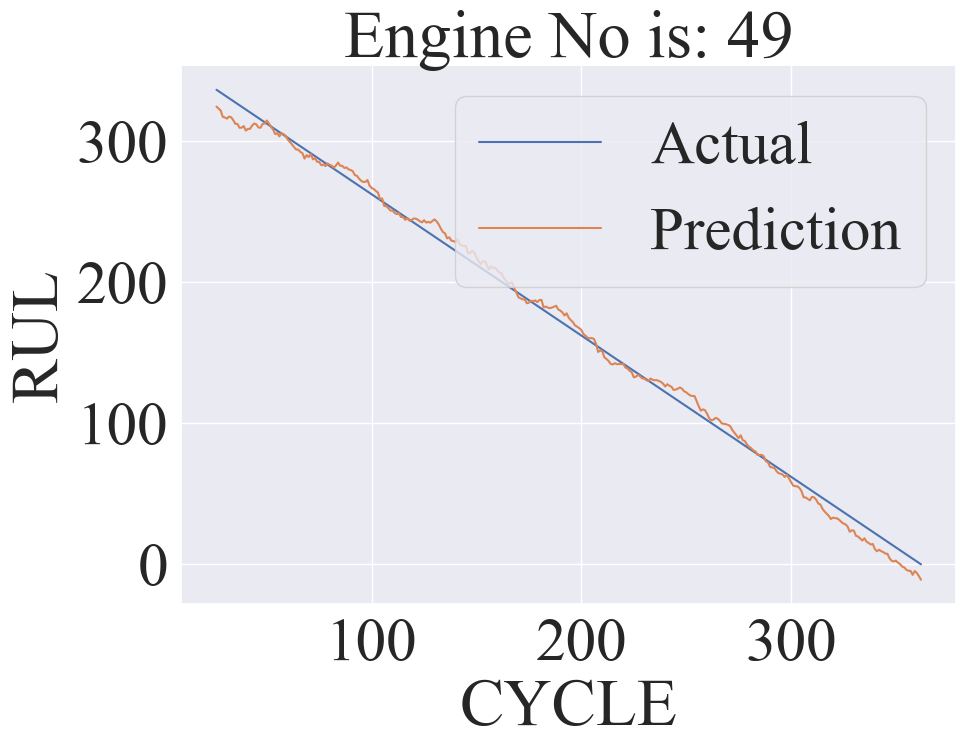



Shape of df for engine 89:  (217, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 11.754718043774853


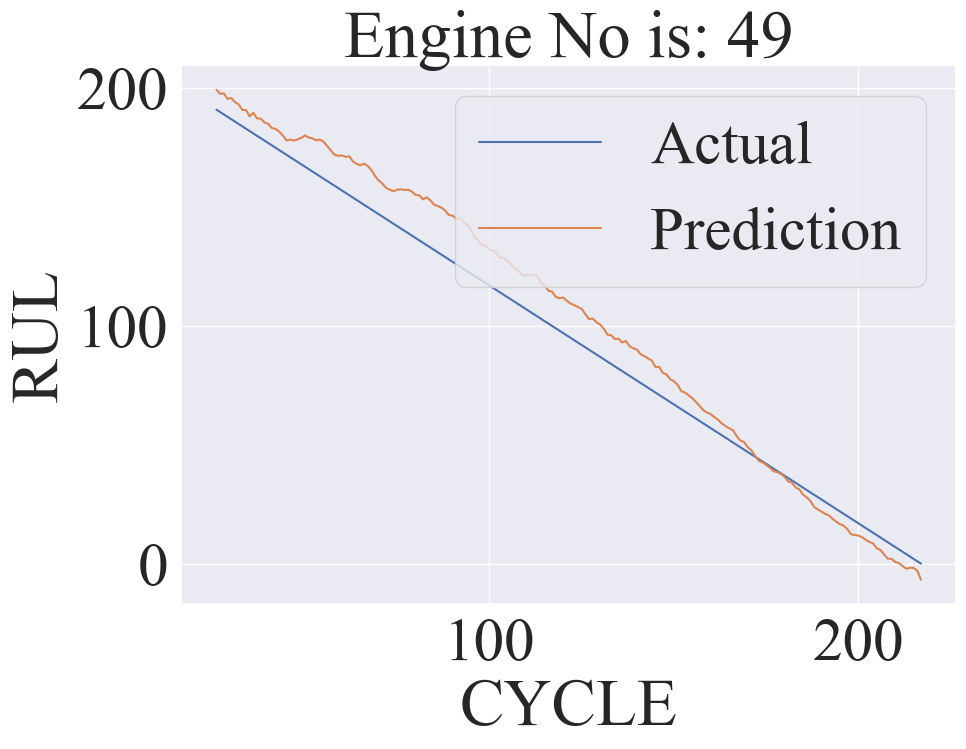



Shape of df for engine 74:  (166, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 15.775790387246316


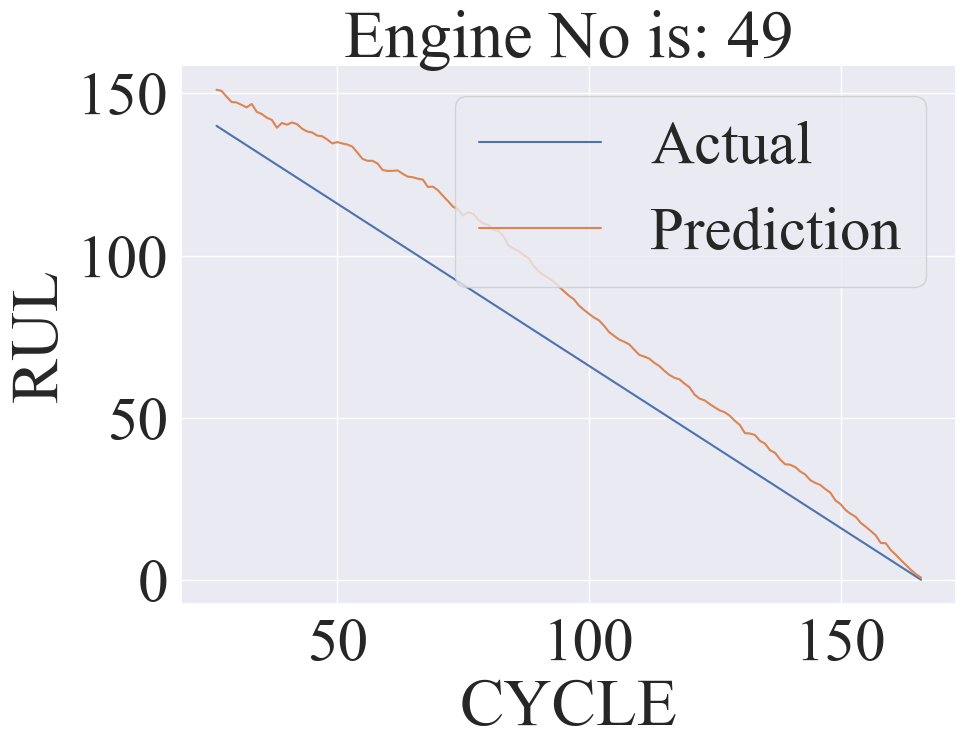



Shape of df for engine 78:  (231, 14)
7/7 [==============================] - 0s 2ms/step
RMSE on This set: 12.276587003210556


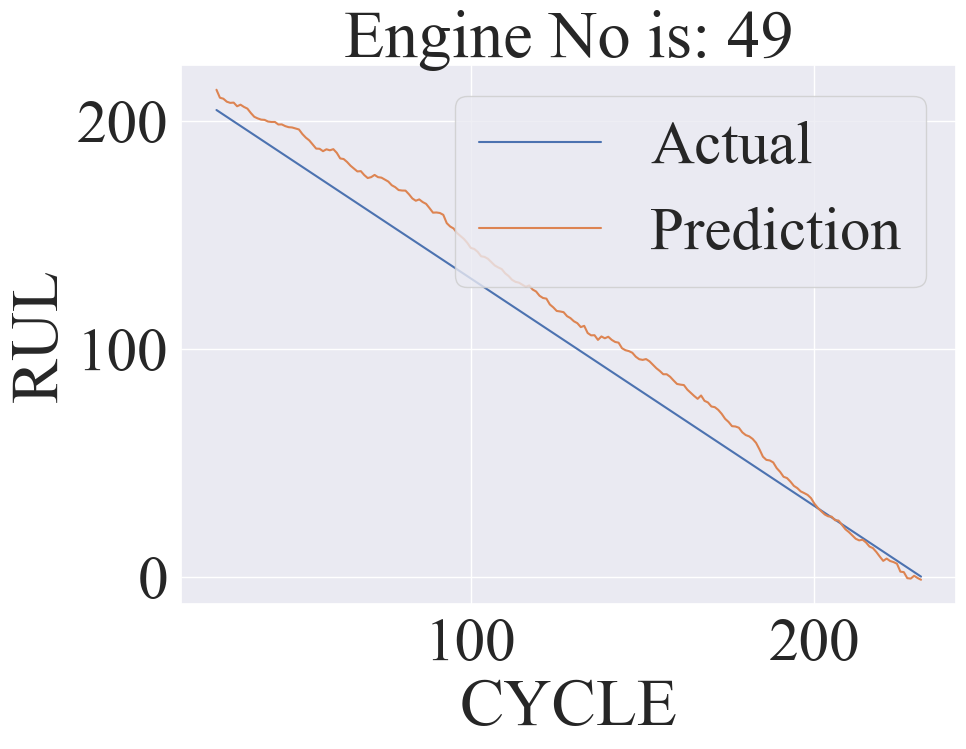



Shape of df for engine 78:  (231, 14)
7/7 [==============================] - 0s 3ms/step
RMSE on This set: 12.276587003210556


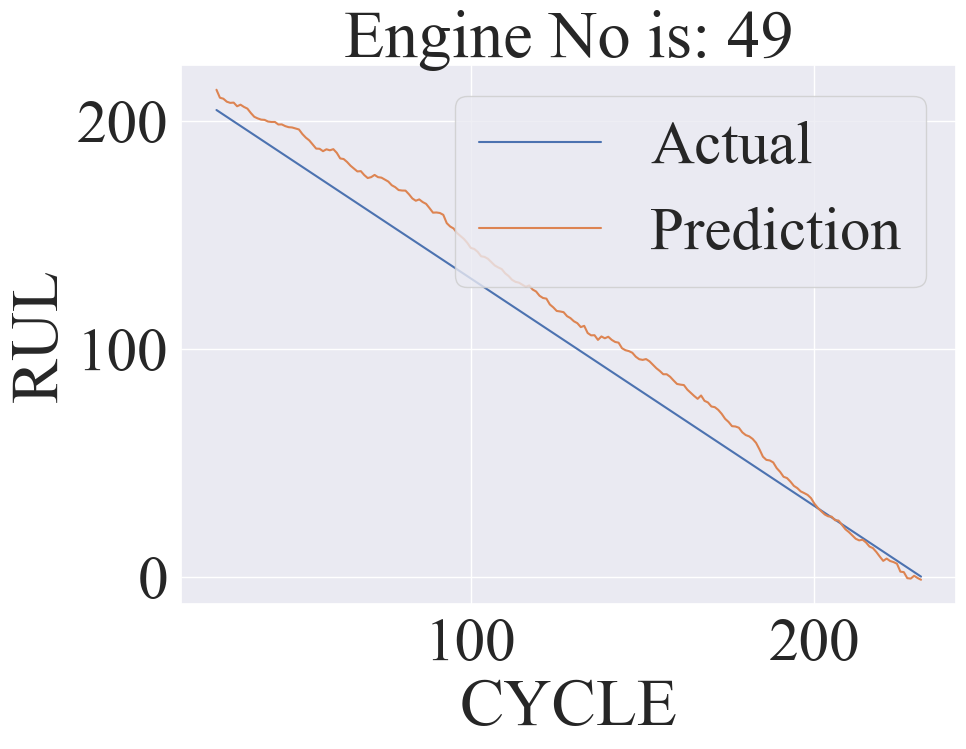



Shape of df for engine 57:  (137, 14)
4/4 [==============================] - 0s 3ms/step
RMSE on This set: 10.013008160778936


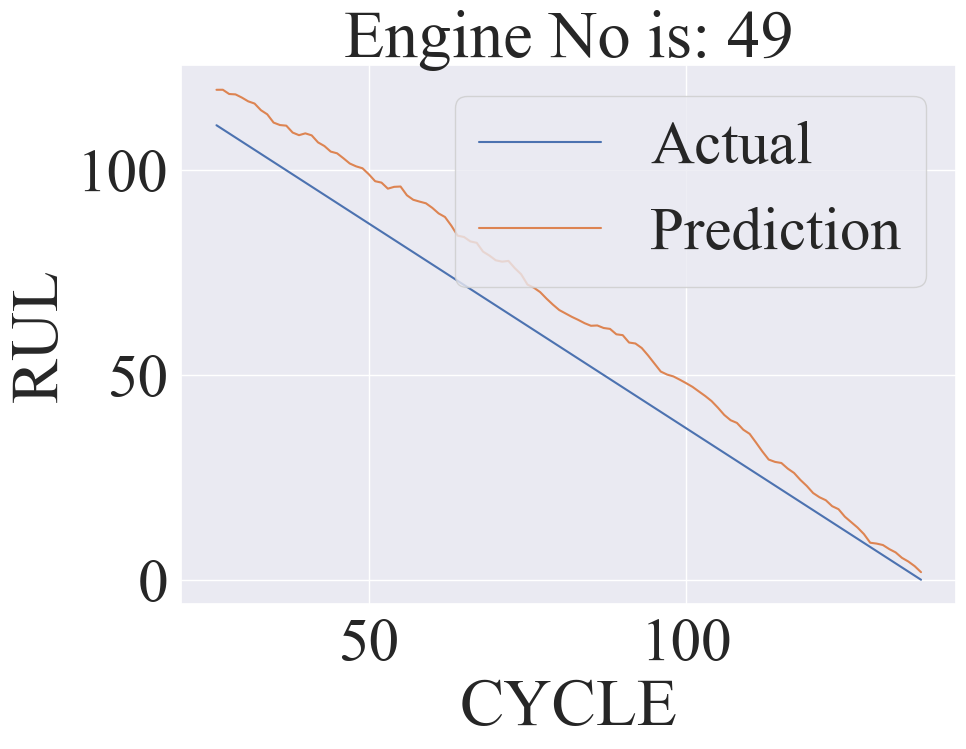



Shape of df for engine 70:  (137, 14)
4/4 [==============================] - 0s 2ms/step
RMSE on This set: 6.0475172676956515


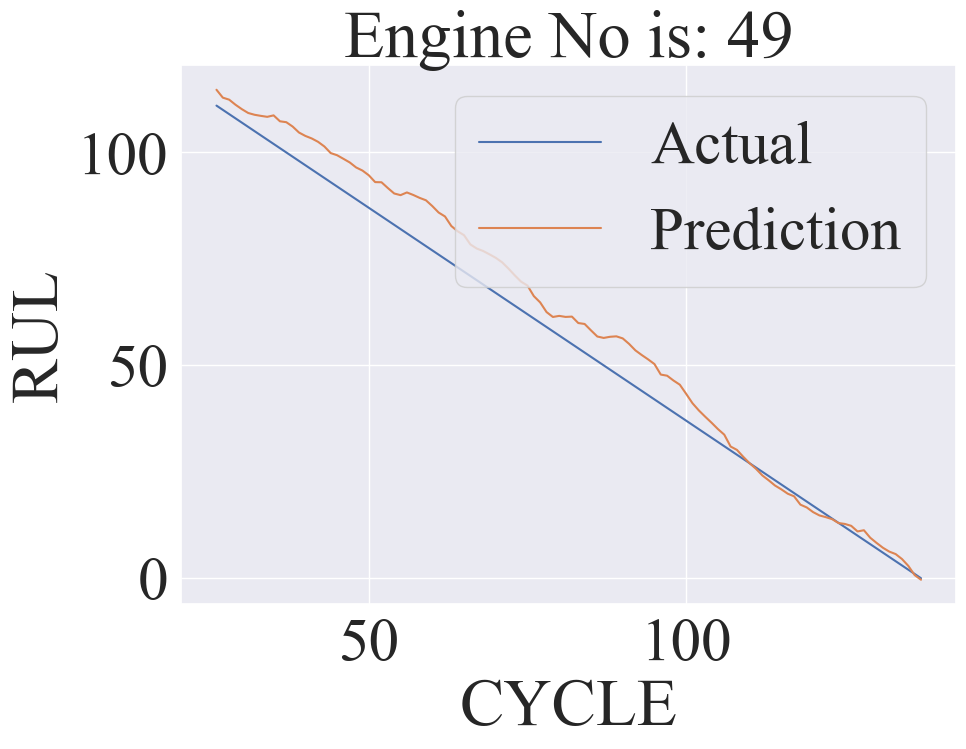



Shape of df for engine 84:  (267, 14)
8/8 [==============================] - 0s 3ms/step
RMSE on This set: 13.212758162707647


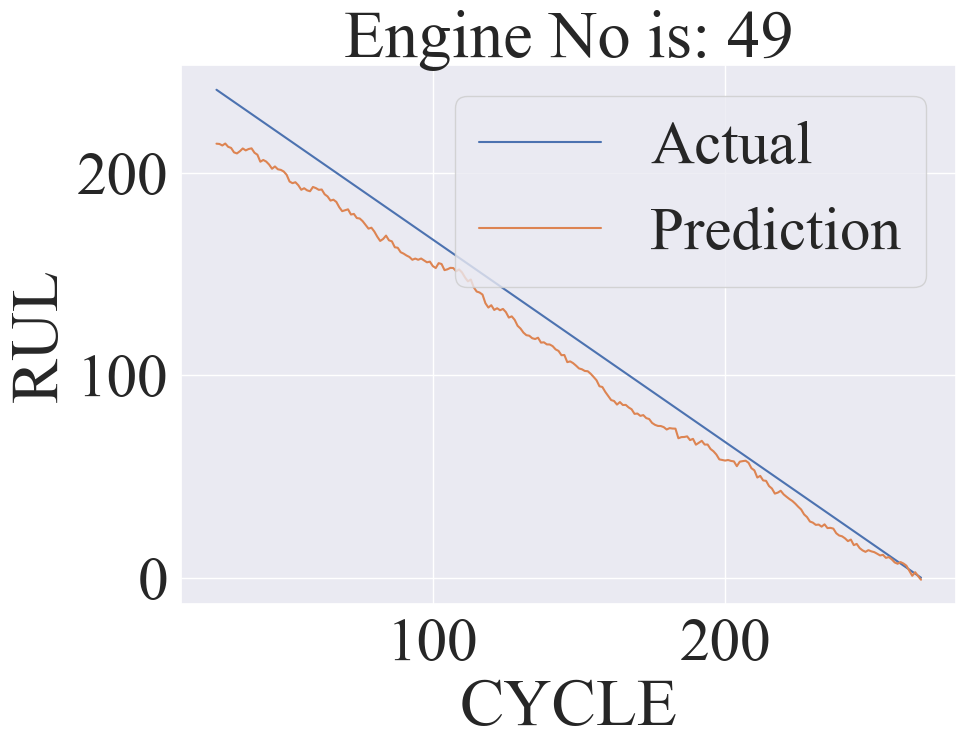



Shape of df for engine 75:  (229, 14)
7/7 [==============================] - 0s 3ms/step
RMSE on This set: 6.264850398680502


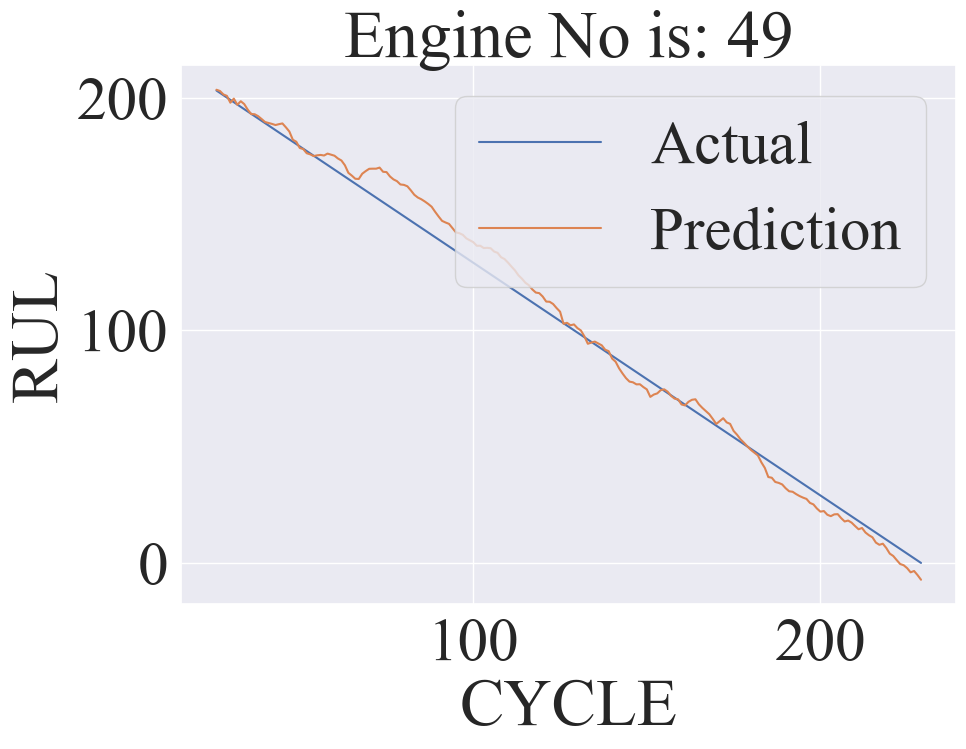

In [100]:
Train_no=1

n = np.random.randint(low=51,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])
    
    

    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.figure(figsize=(10, 7))
    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')